# **Preproccessing**

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

**Load data as csv file**

In [208]:
data= pd.read_csv("data.csv")

**Display first 10 records of data to show data columns and types of data to understand data well**

In [209]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


**Display data description to show statistics of the Data(mean, std, min, max etc) for each column in data**

In [210]:
print("Data Description:", data.describe())

Data Description:          Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%        

**using data.info() to display all information about datatset show dtypes  and Non-Null count for each column**

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**show the Number of Null values in the dataset to determine, based on results, how to handle null values and in which columns contain null values to replace it**

In [212]:
print("Null values:", data.isnull().sum())

Null values: Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


**Handle columns that contain missing values by using the mean technique for all columns with a numeric datatype**

In [213]:
for col in data.columns:
    if data[col].isnull().any():
        if pd.api.types.is_numeric_dtype(data[col]):
            data[col].fillna(data[col].mean(), inplace=True)

**show if there is any duplicates in dataset or not to handle it**

In [214]:
duplicates = data.duplicated().sum()
print(duplicates)

0


**Apply LabelEncoding Technique to convert features from categorical features (string datatype columns in dataset) into numerical features (that contain in the range 0 to 1)  to be easy to apply any Feature selection technique to prepare data well**

In [215]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if pd.api.types.is_string_dtype(data[col]):
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        print(f"Label Encoded column {col} successfully")

**Feature scaling using StandardScaler**

In [216]:
target_col = 'Bankrupt?'

scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop(target_col)
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

**display boxplot for each feature in dataset that help to understand outlier in dataset carefully**

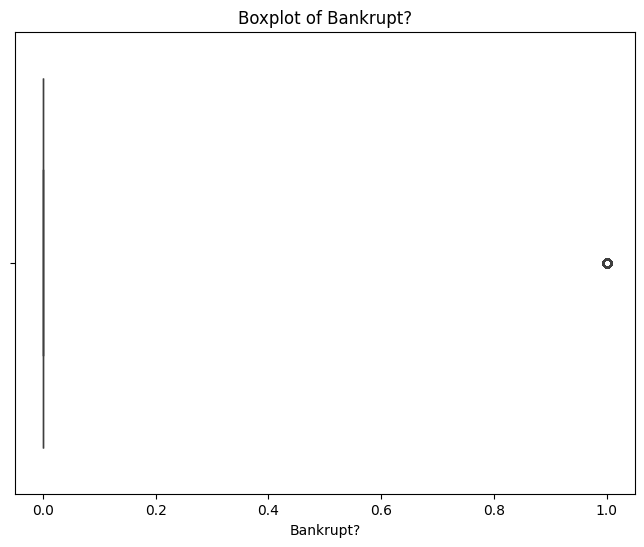

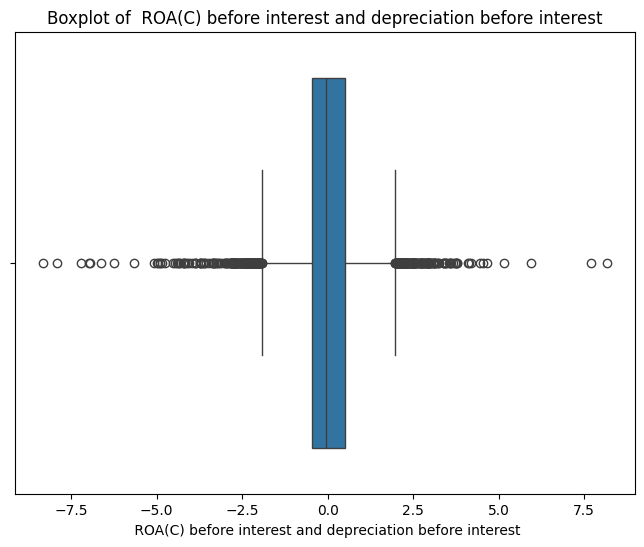

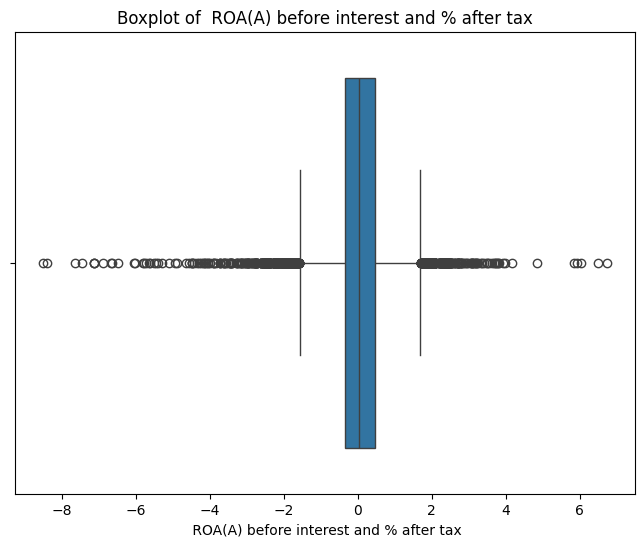

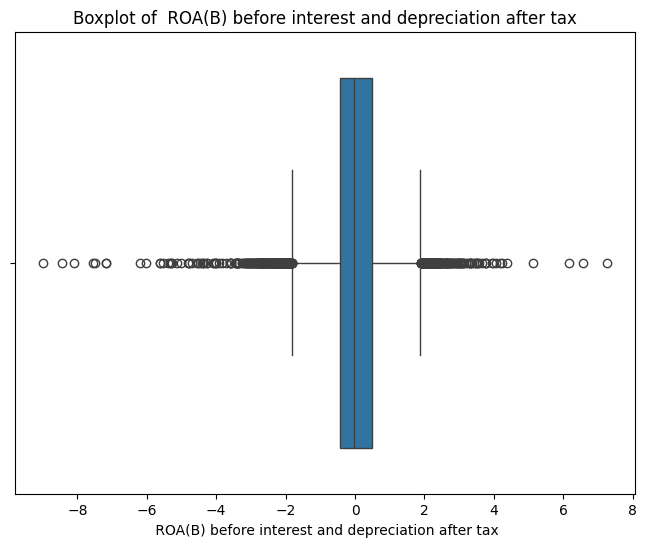

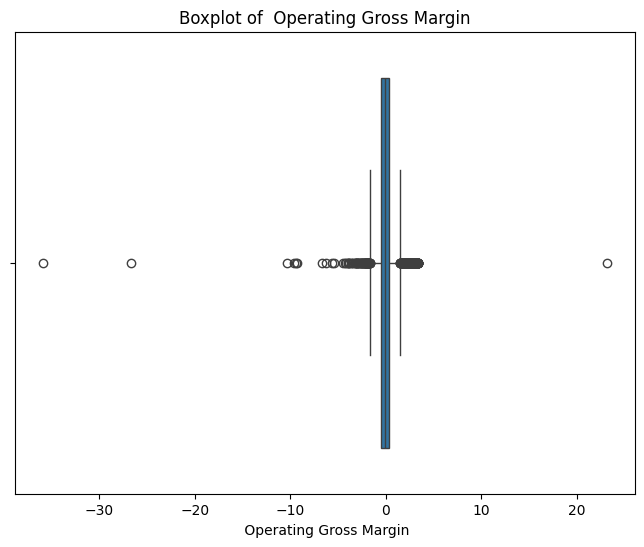

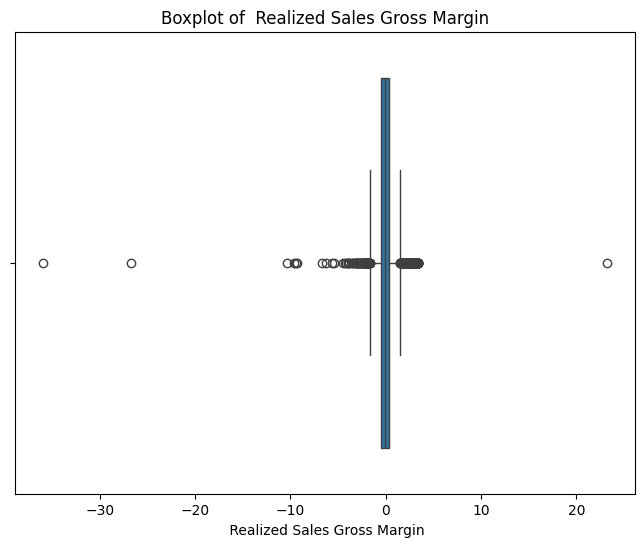

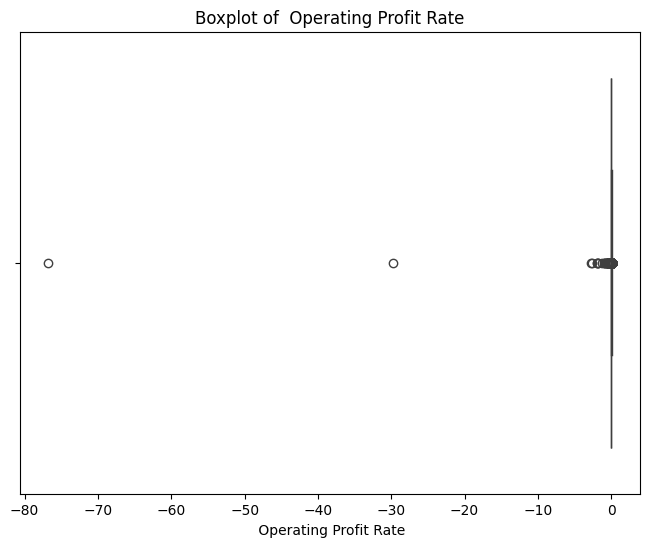

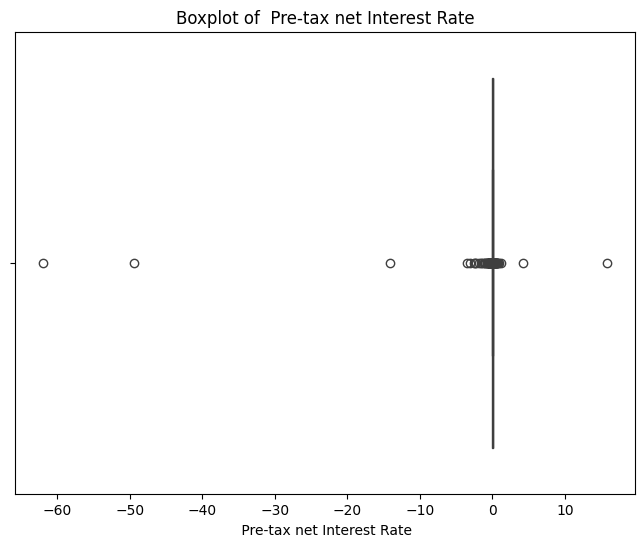

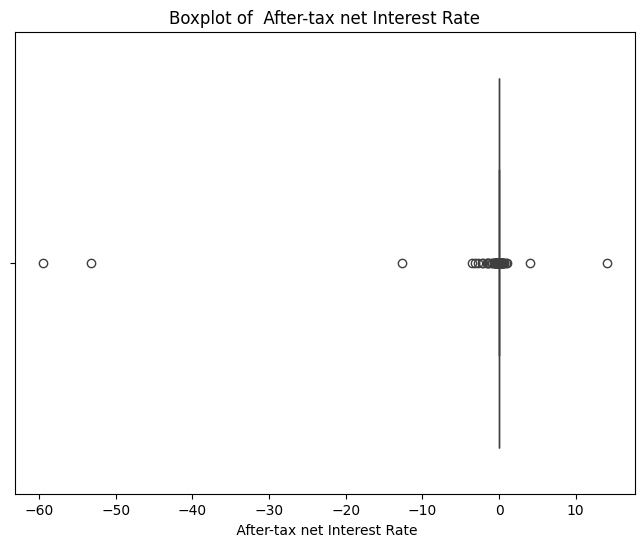

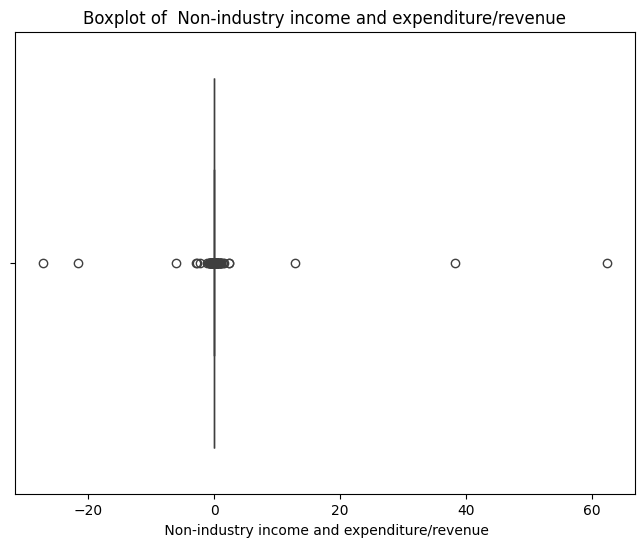

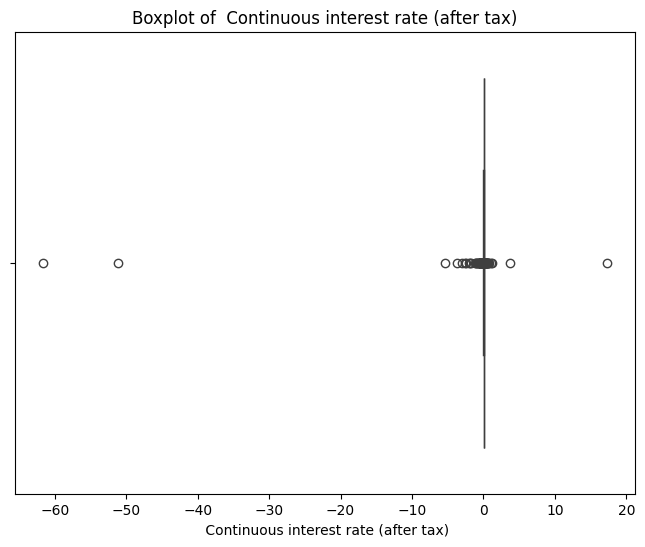

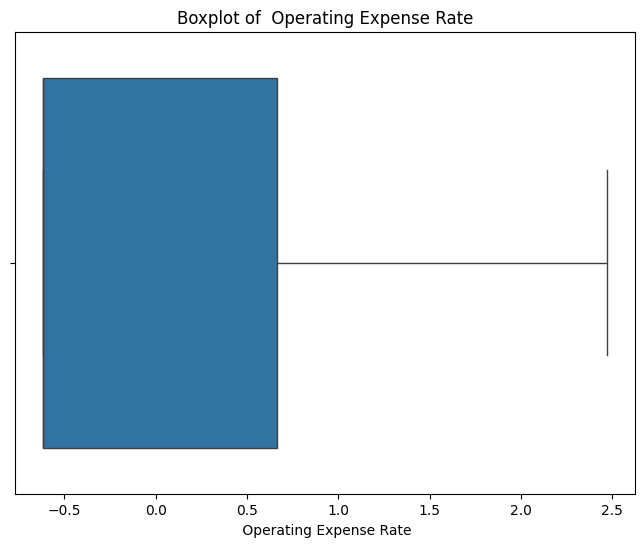

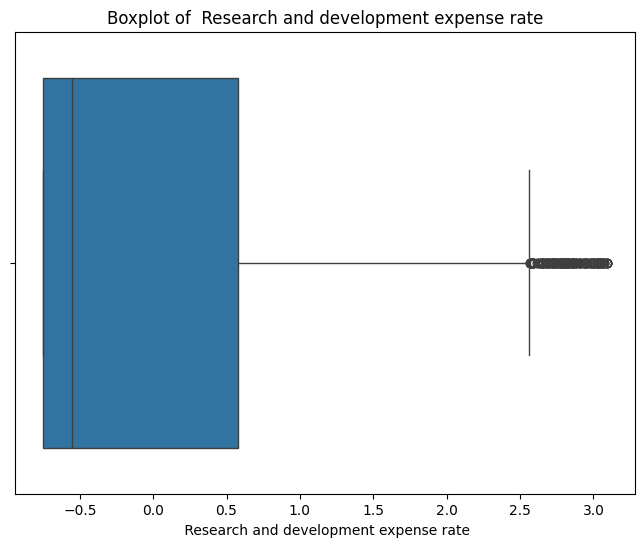

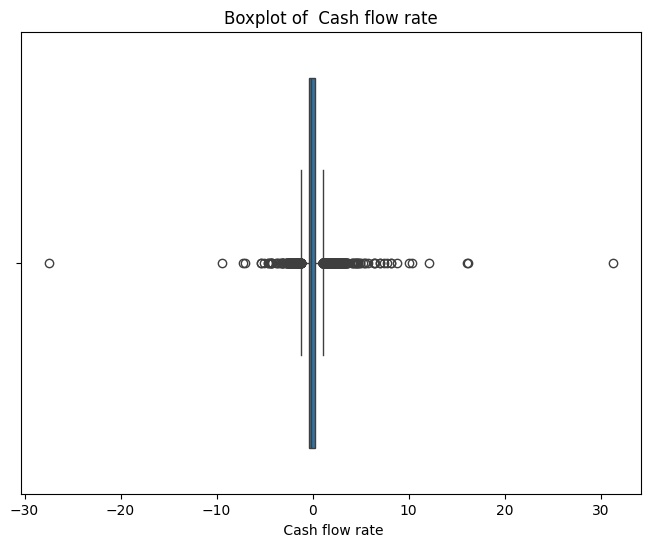

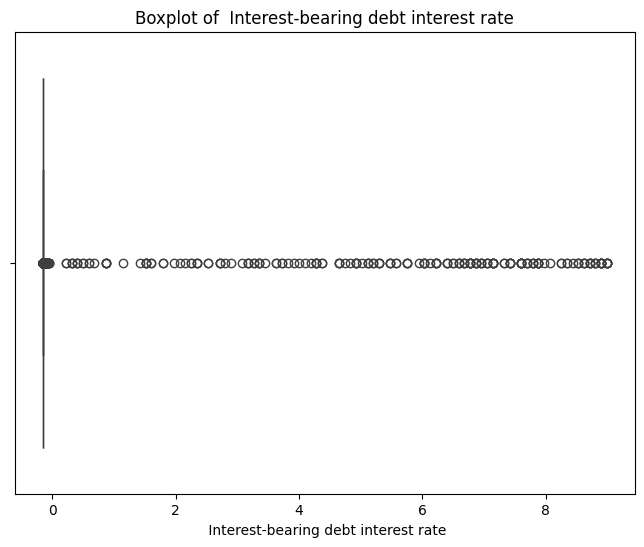

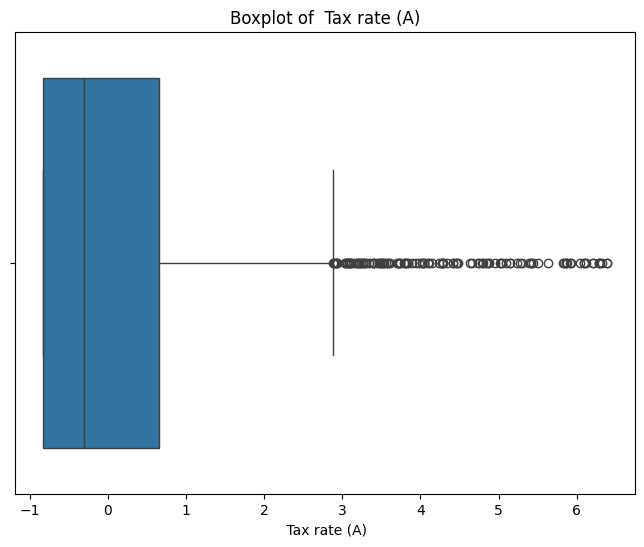

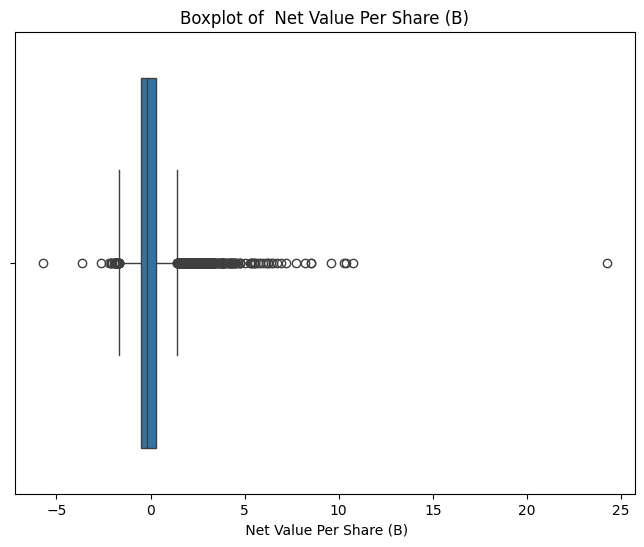

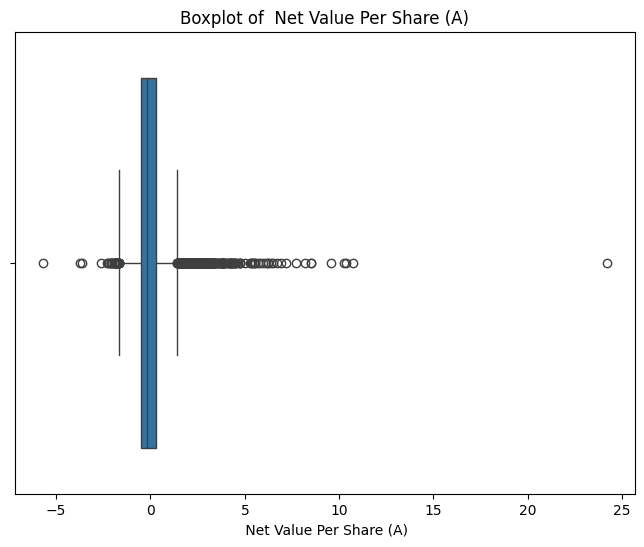

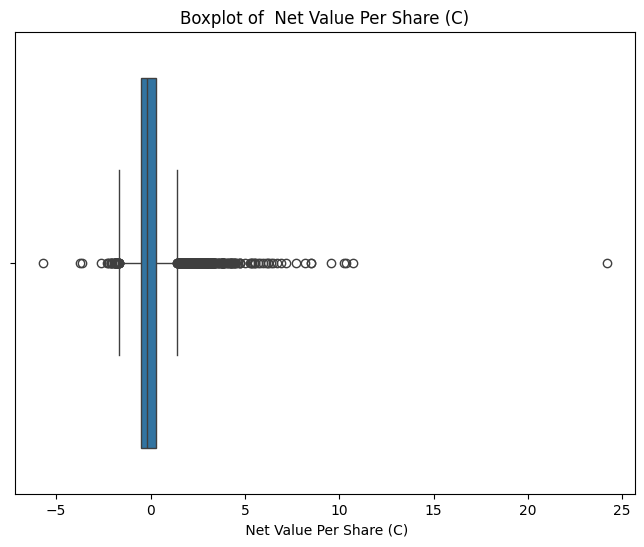

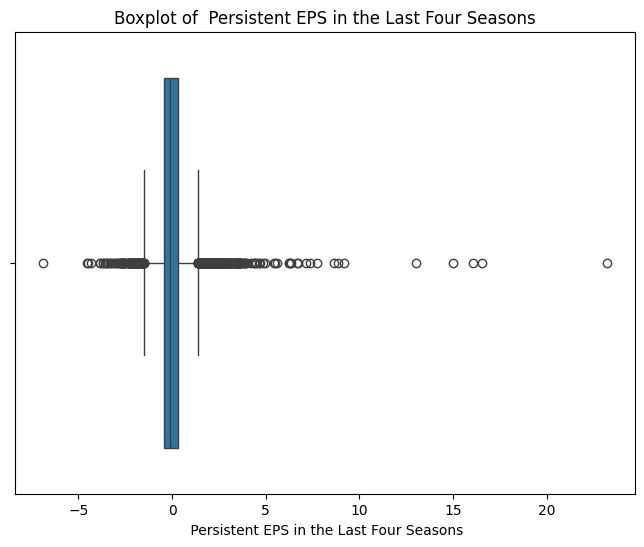

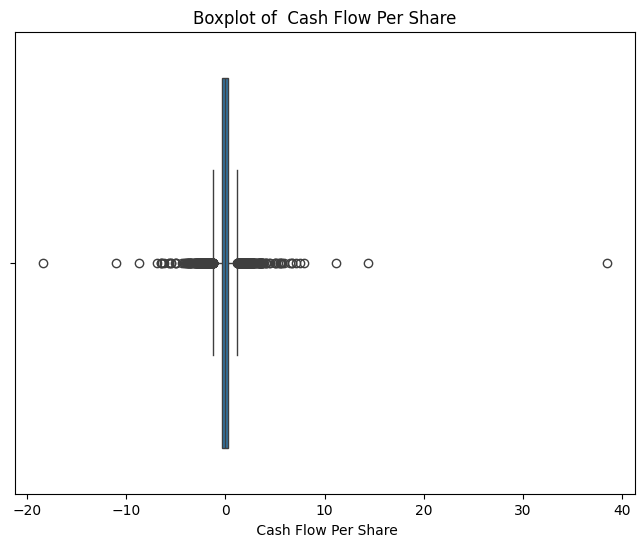

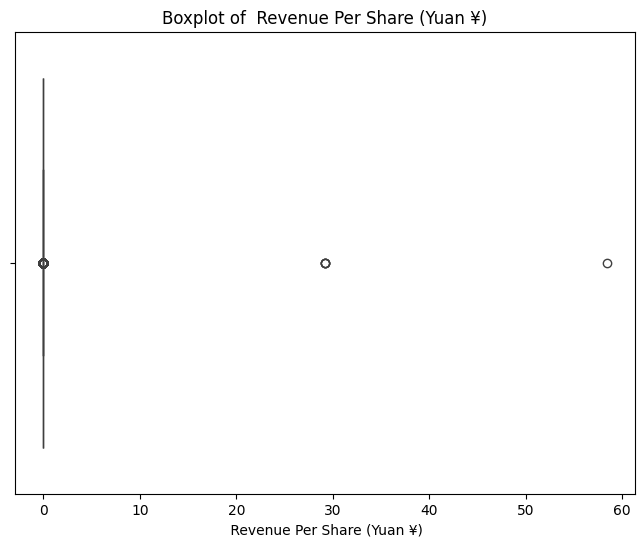

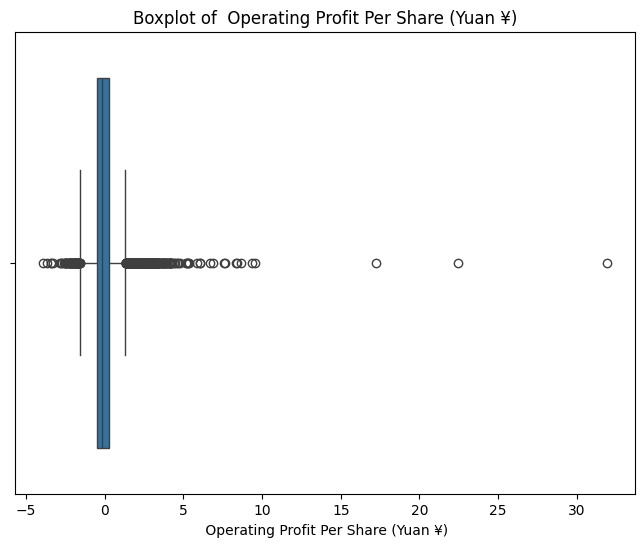

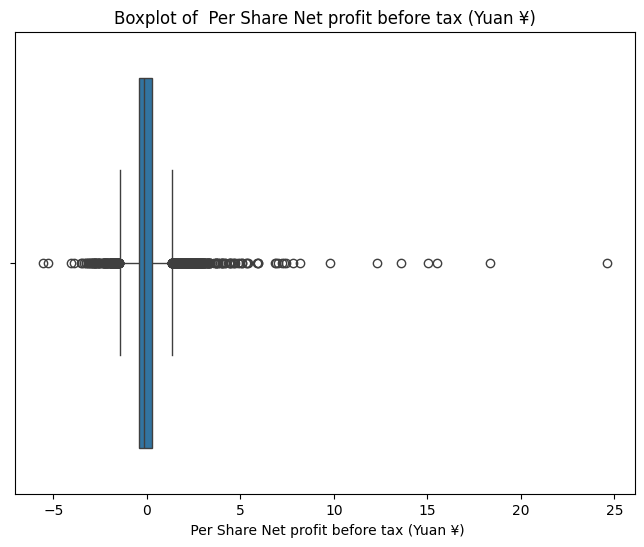

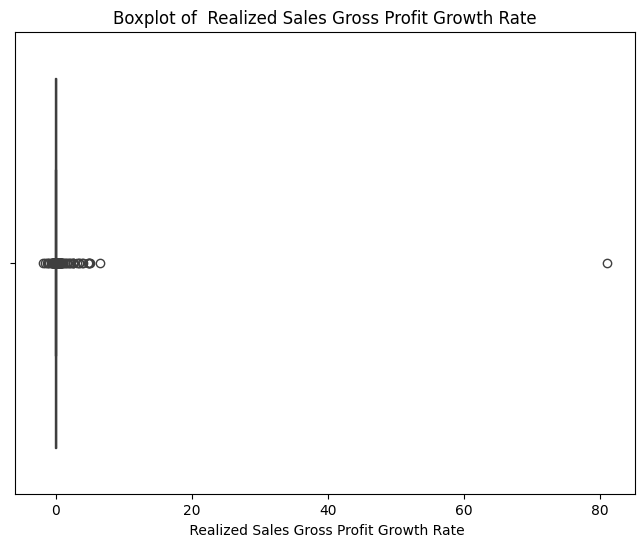

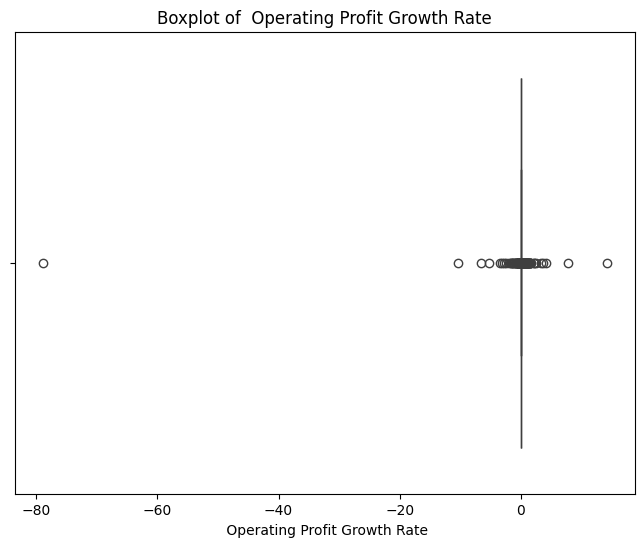

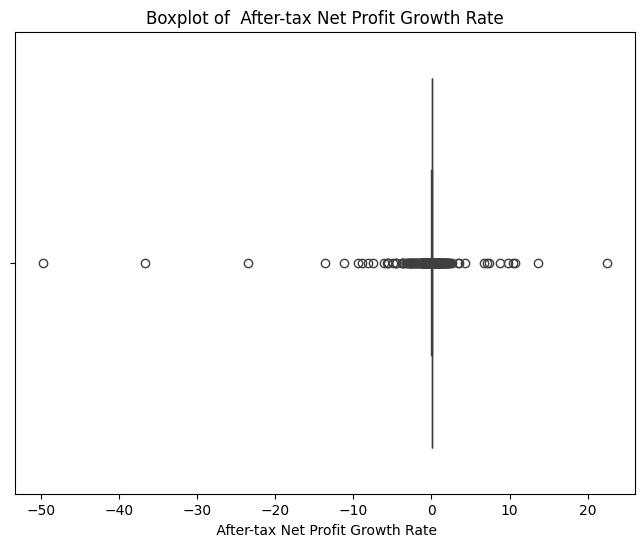

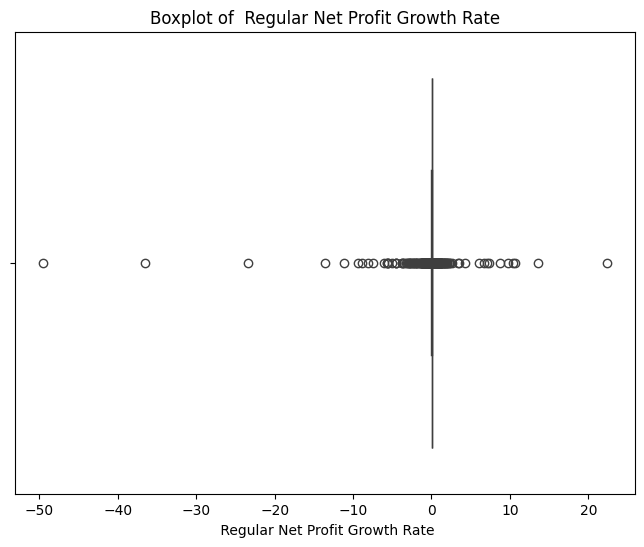

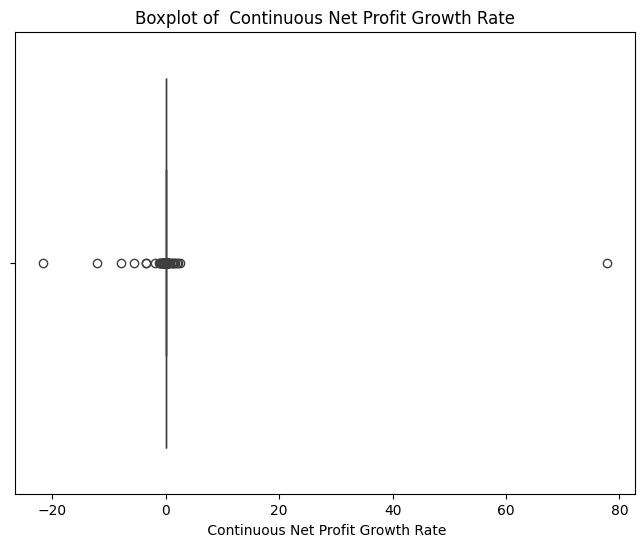

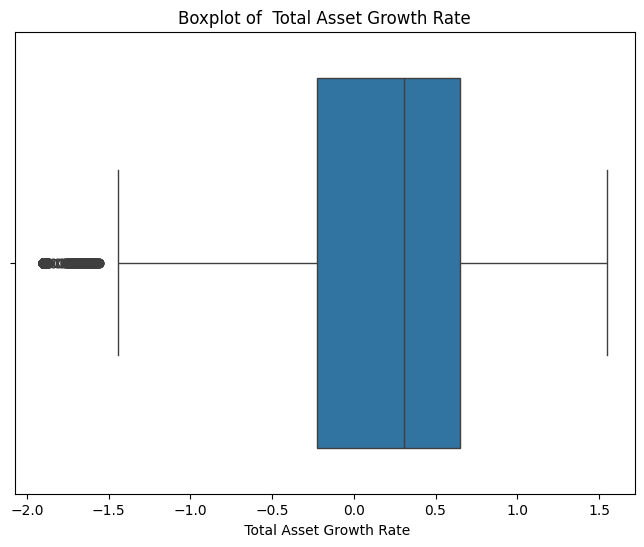

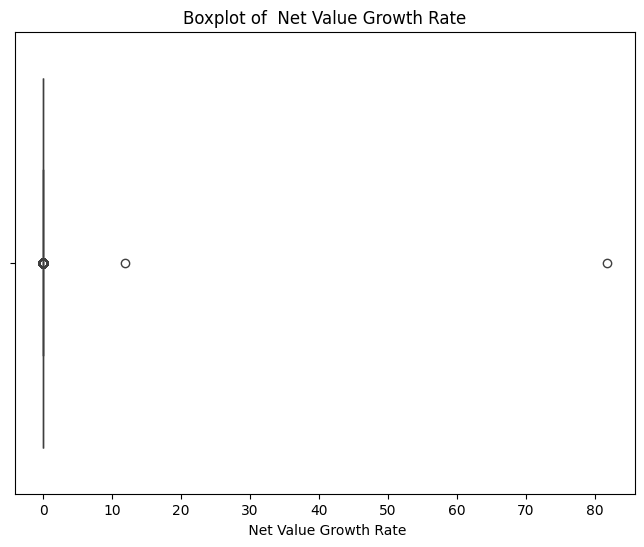

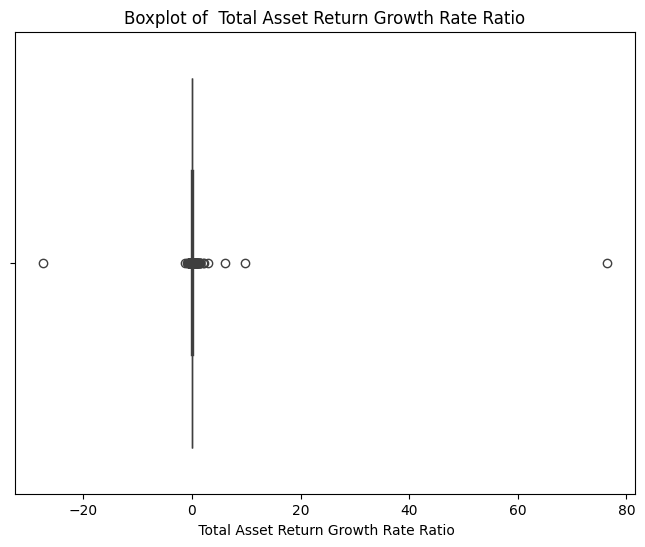

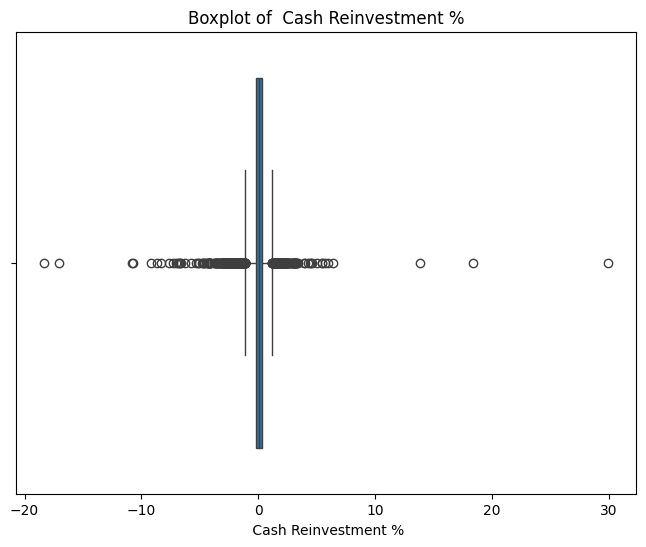

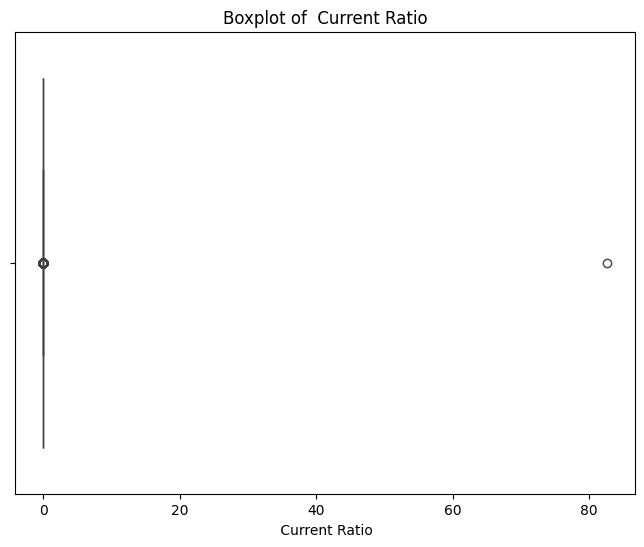

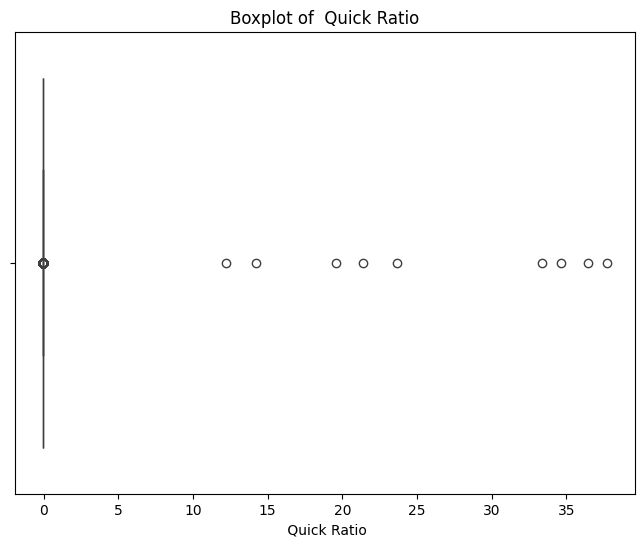

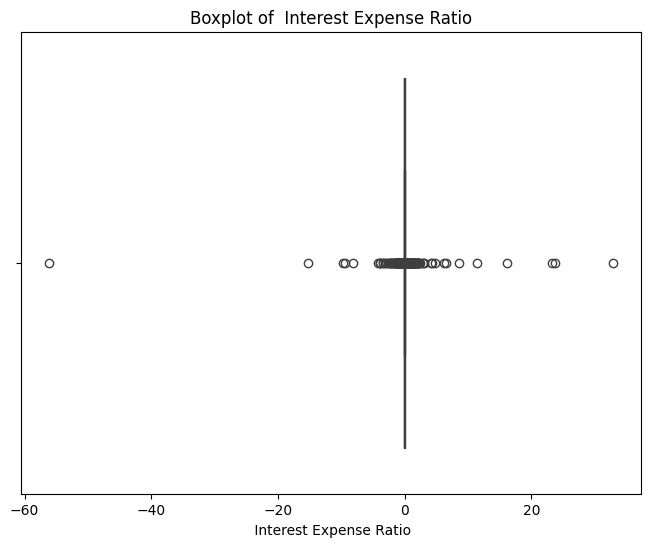

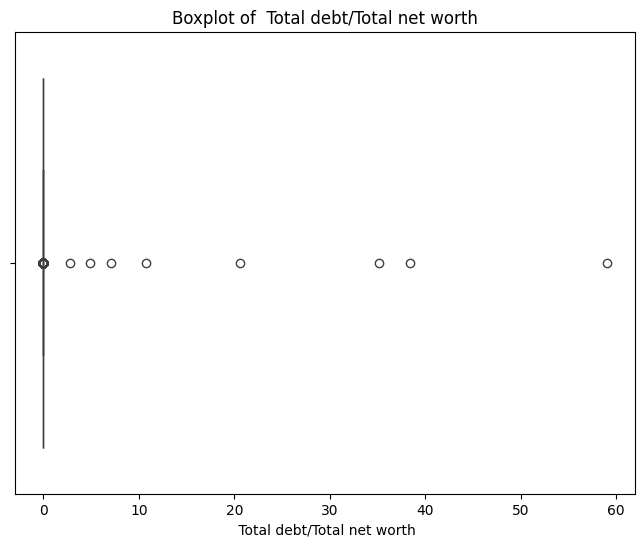

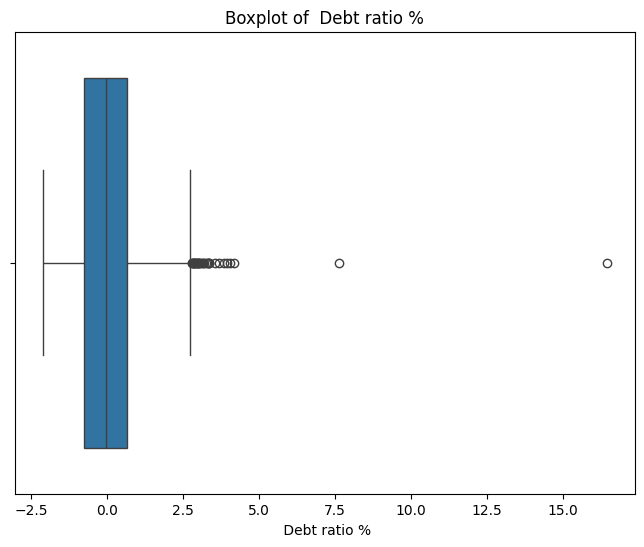

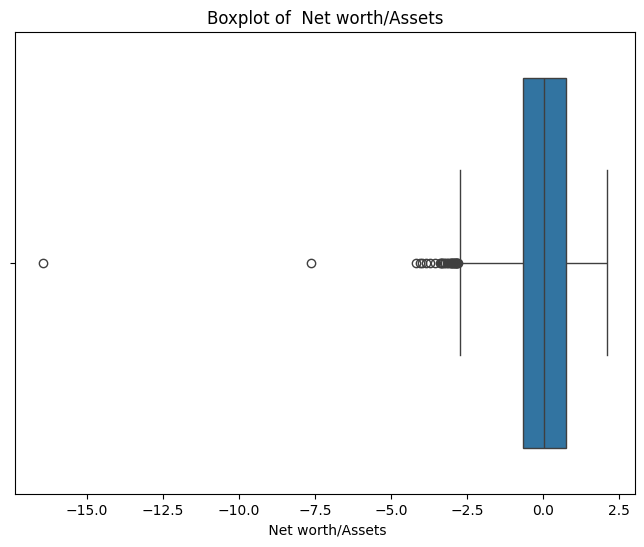

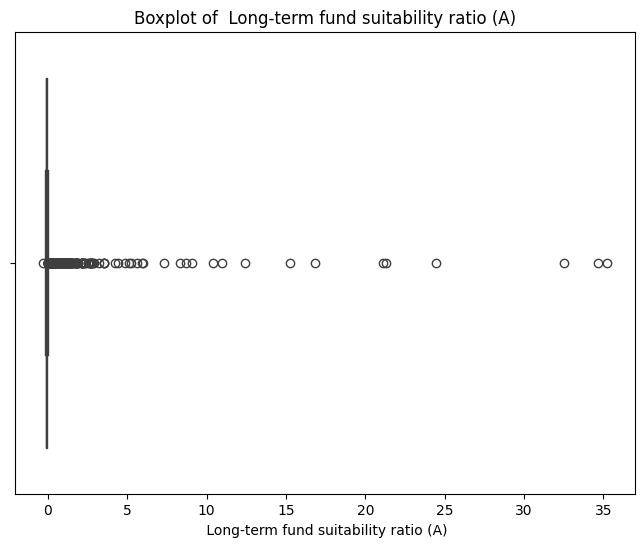

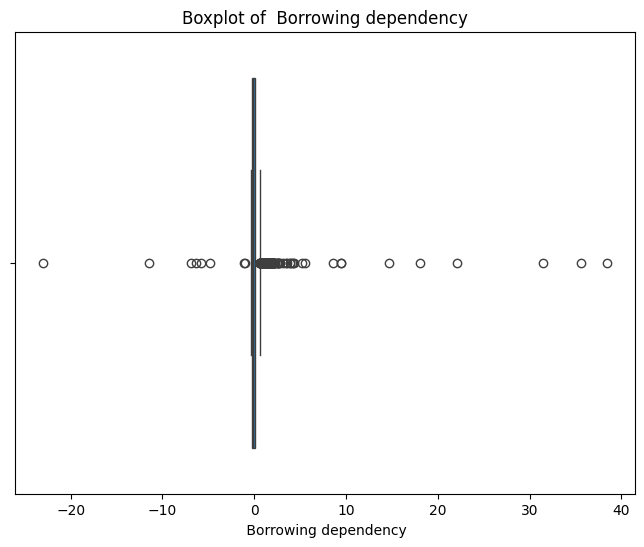

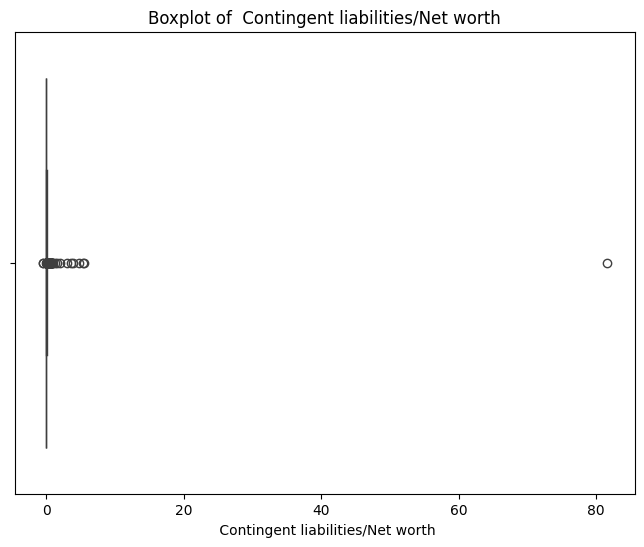

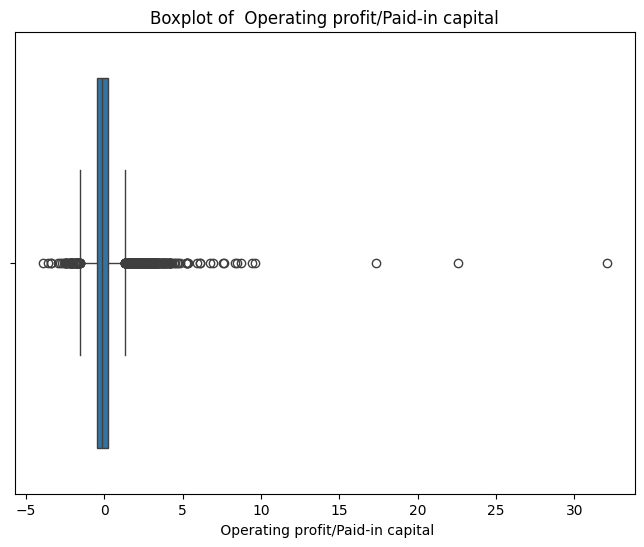

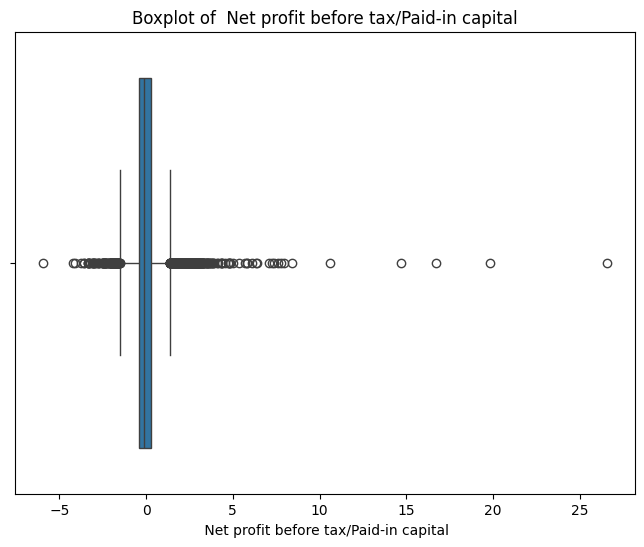

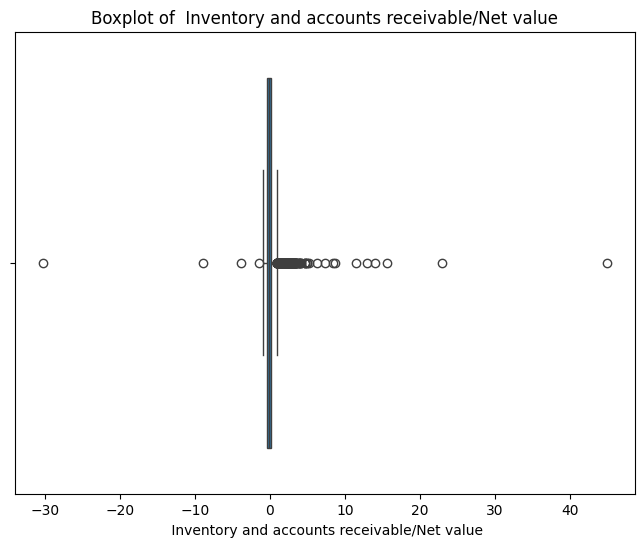

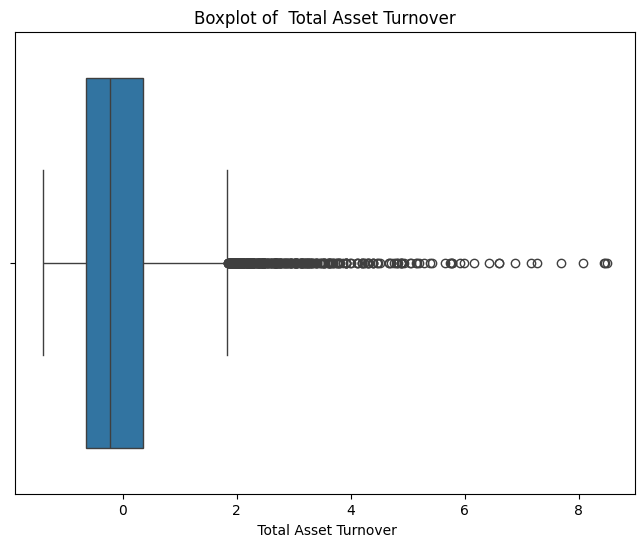

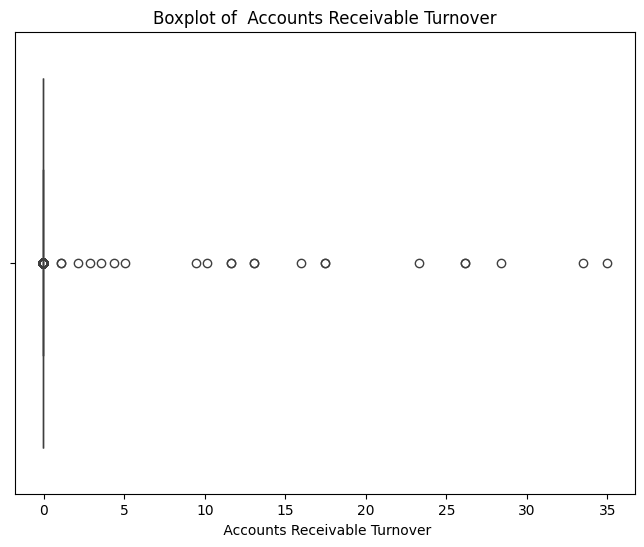

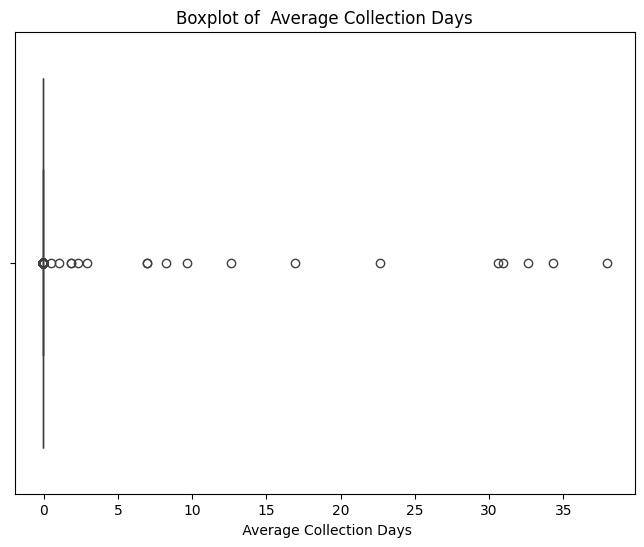

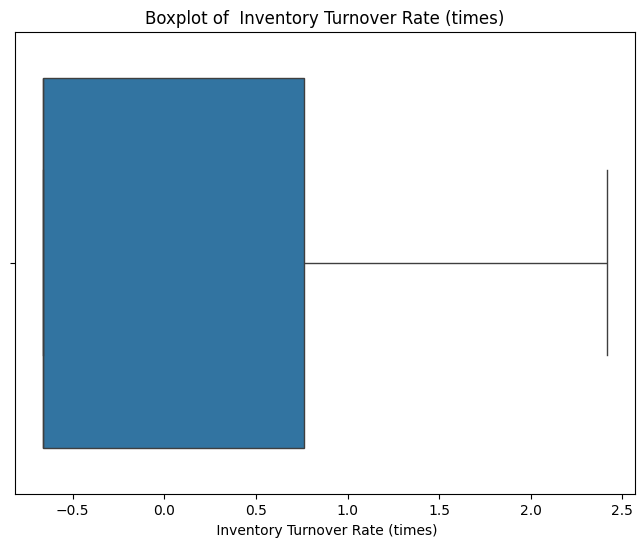

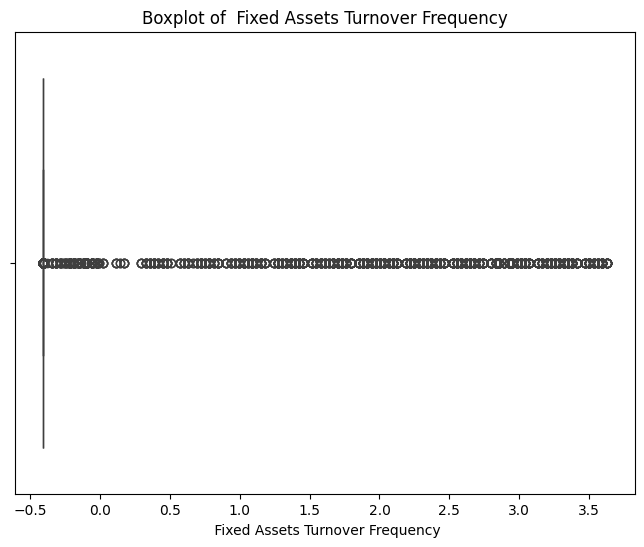

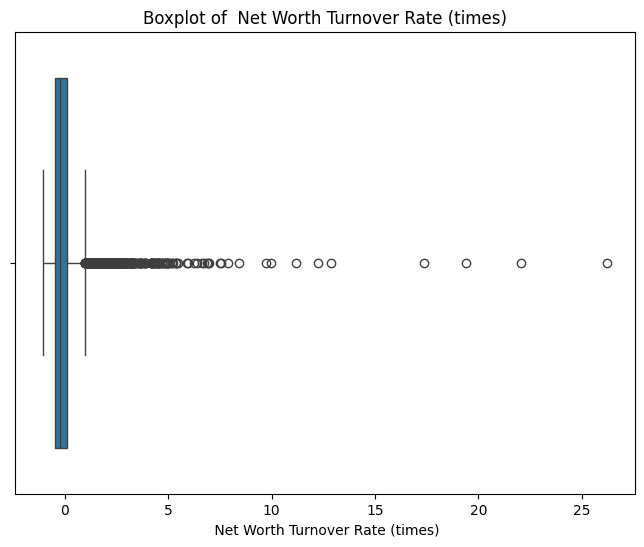

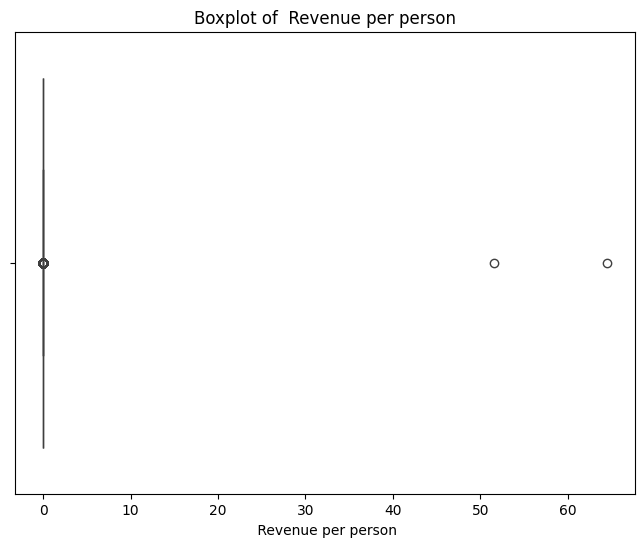

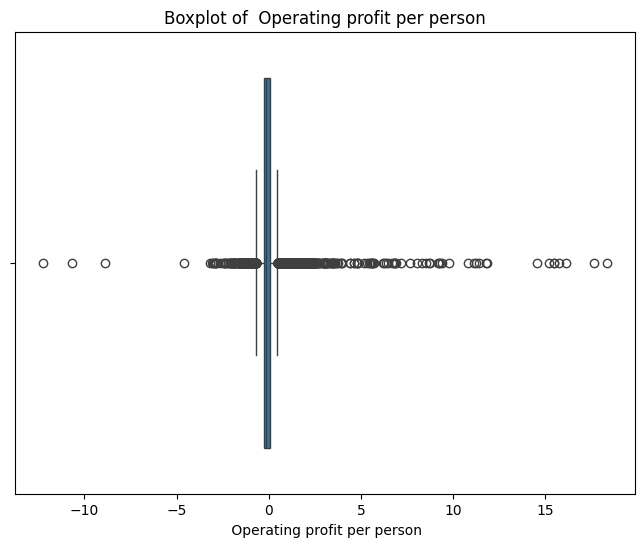

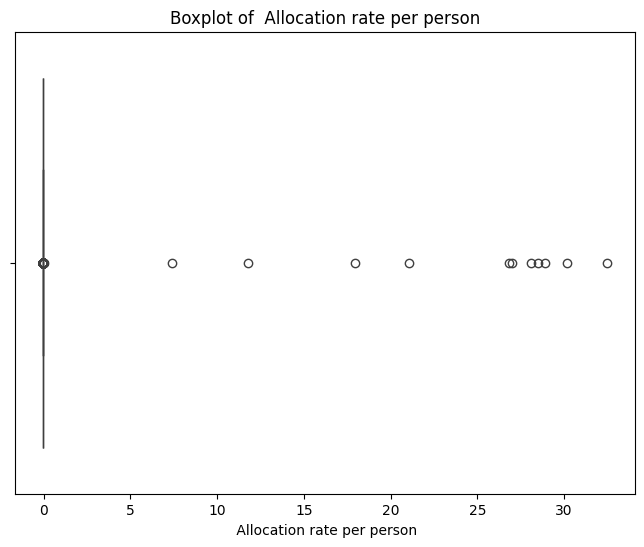

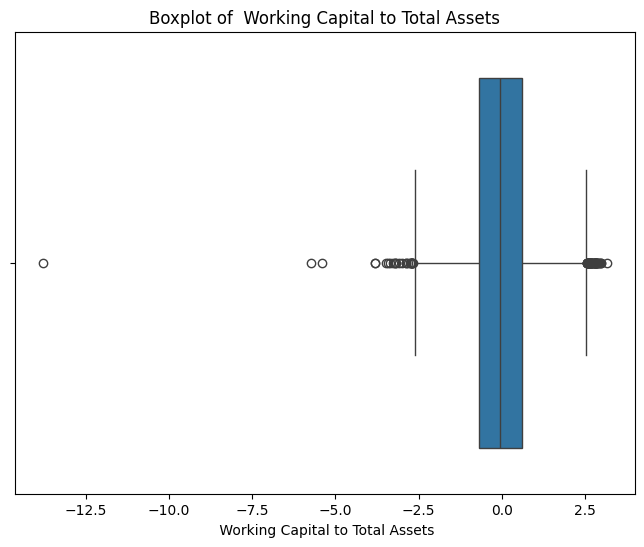

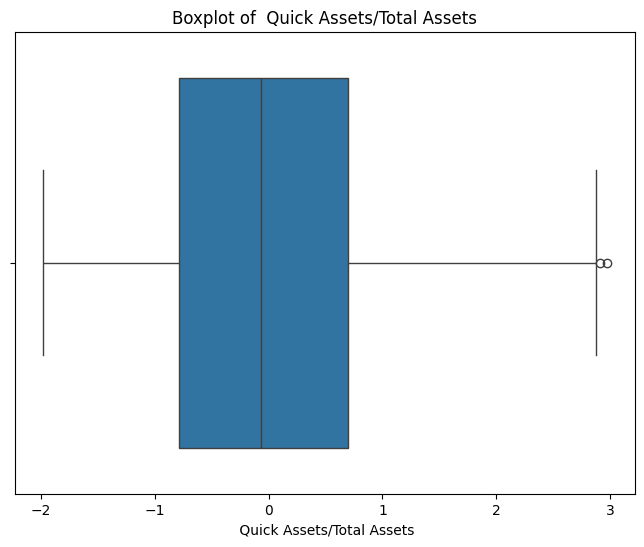

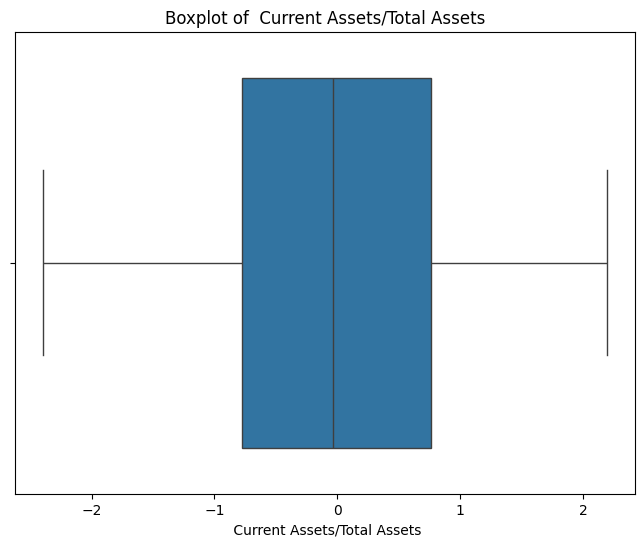

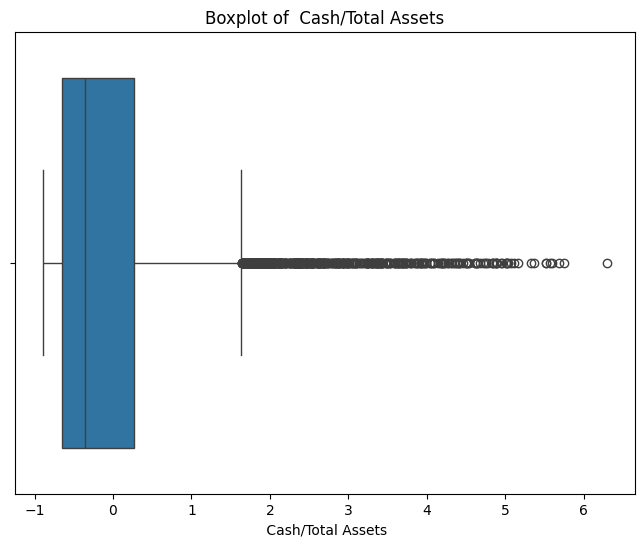

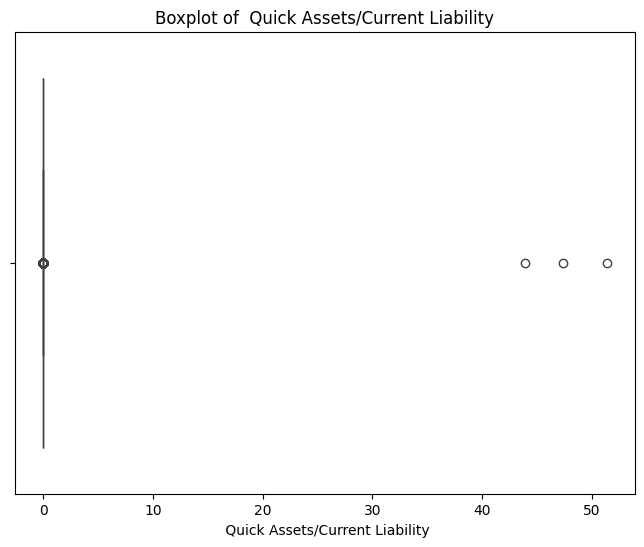

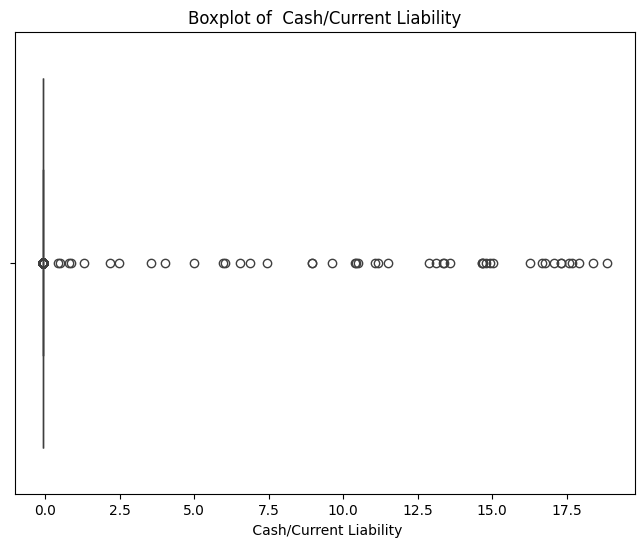

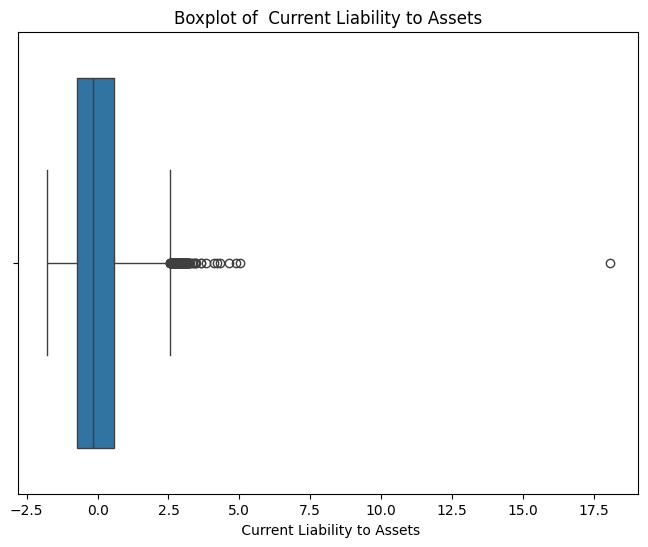

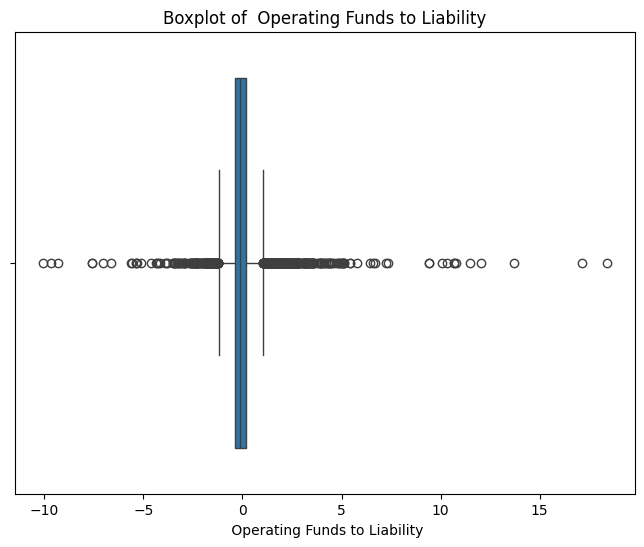

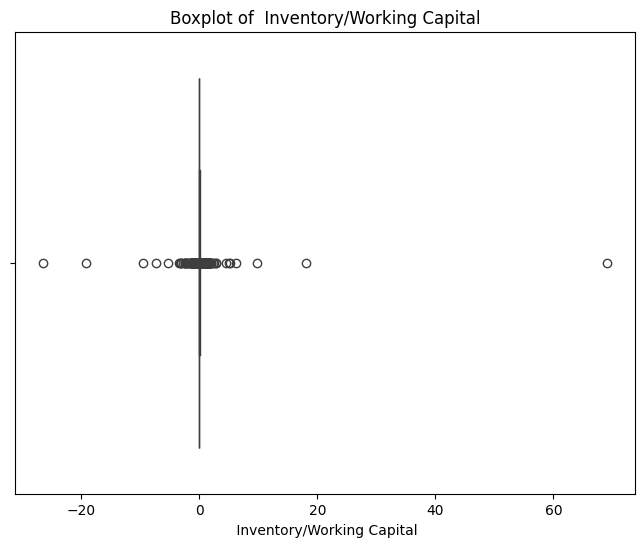

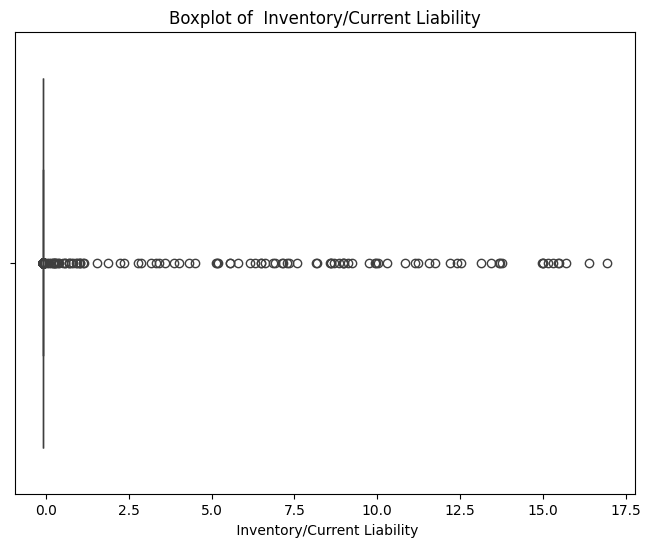

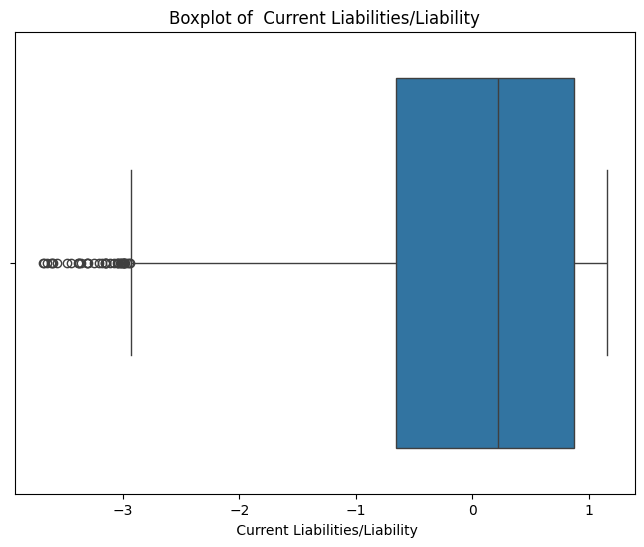

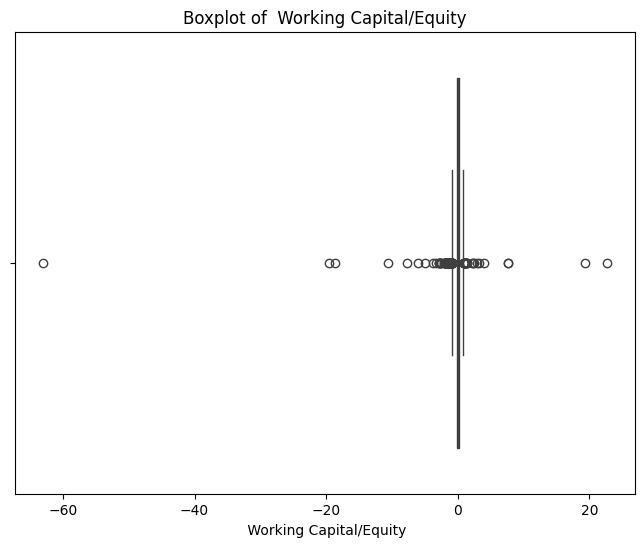

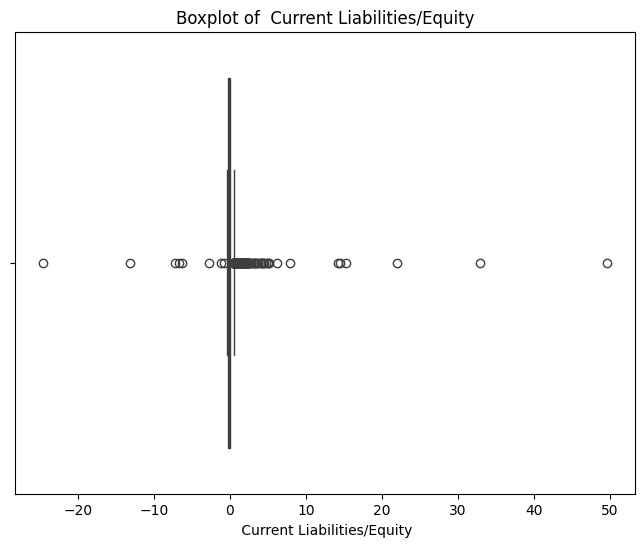

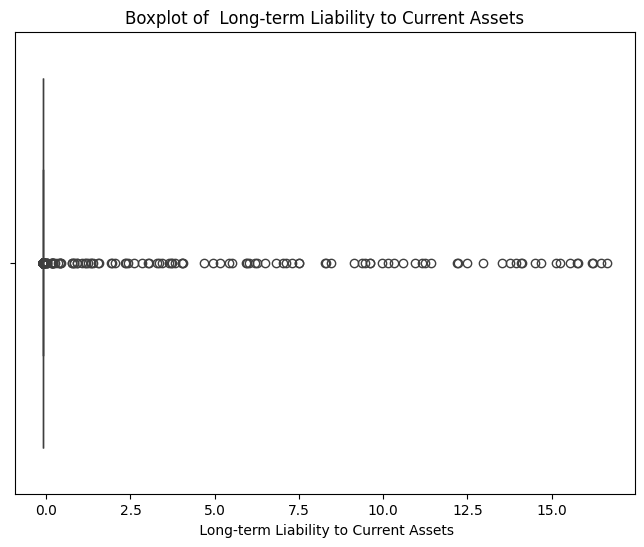

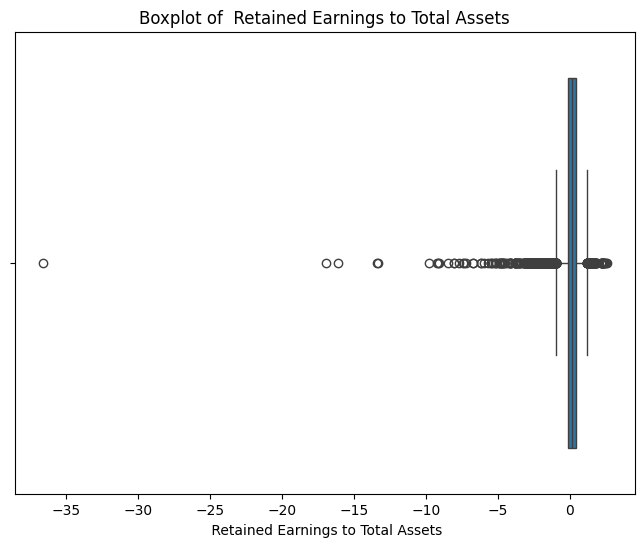

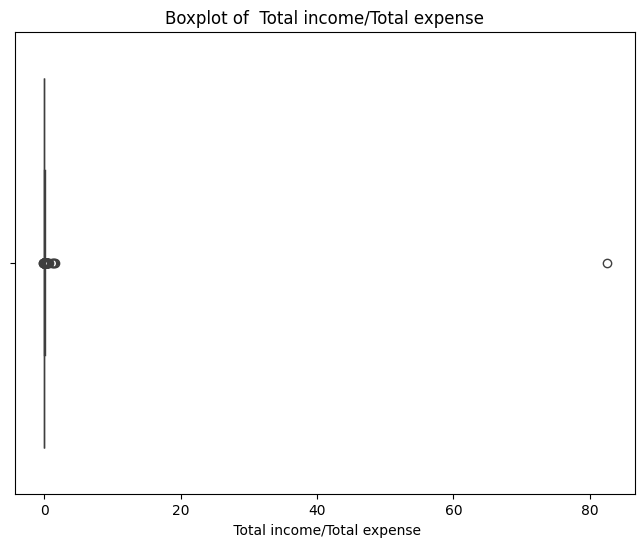

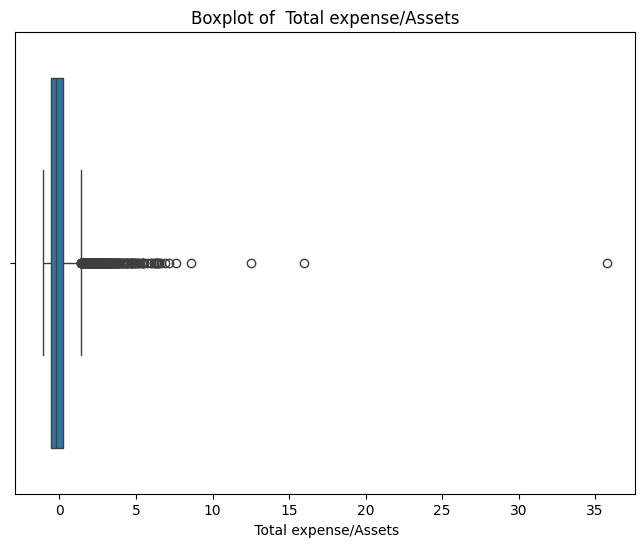

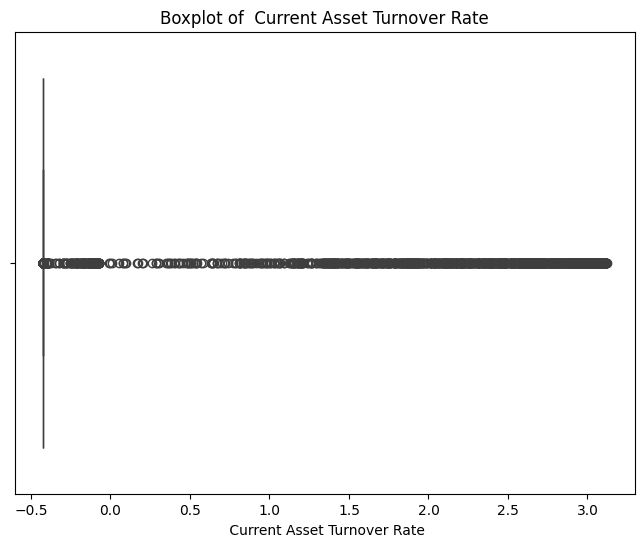

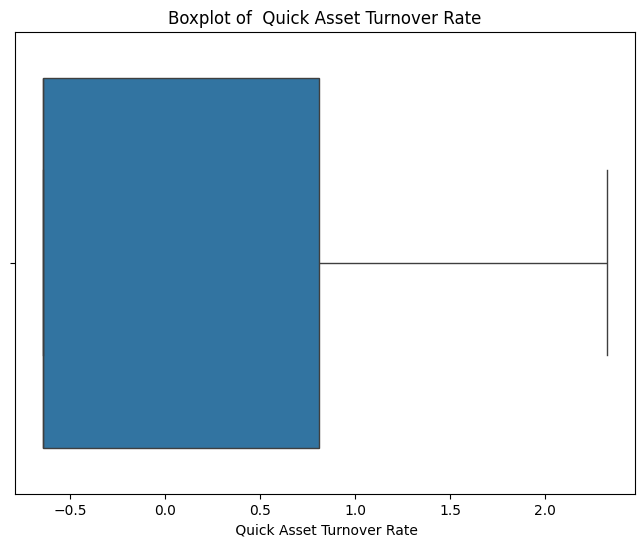

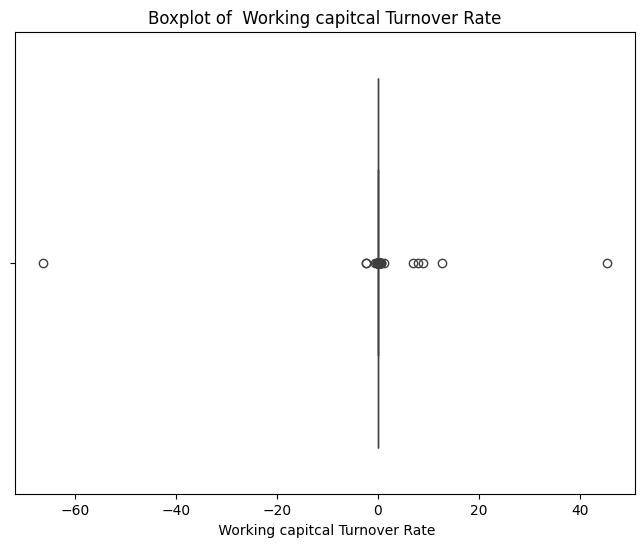

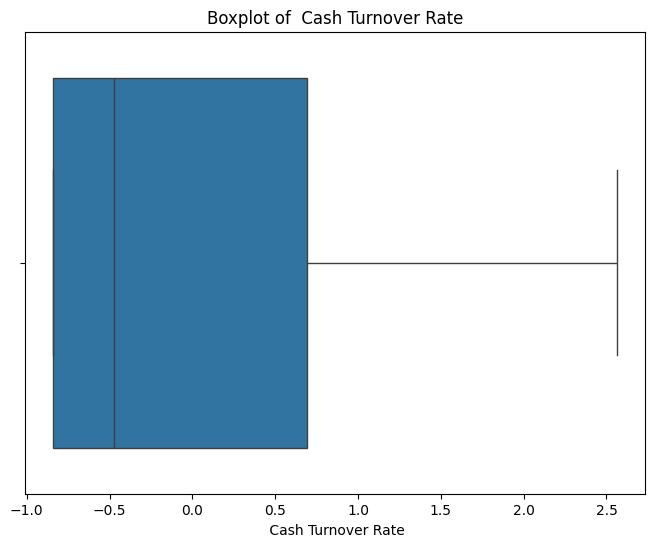

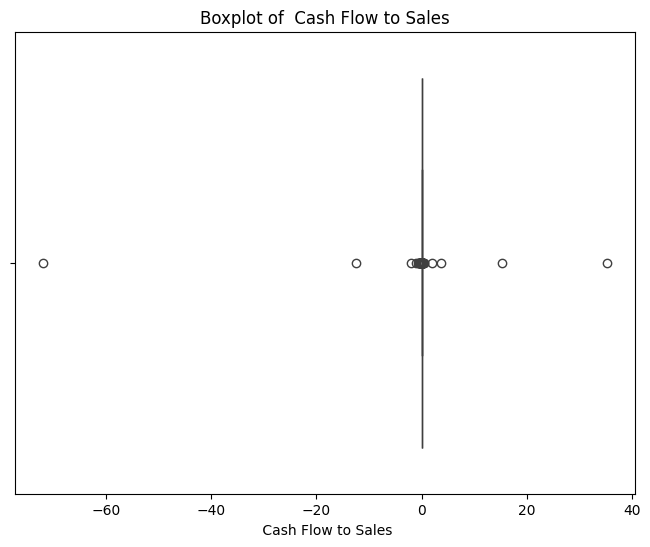

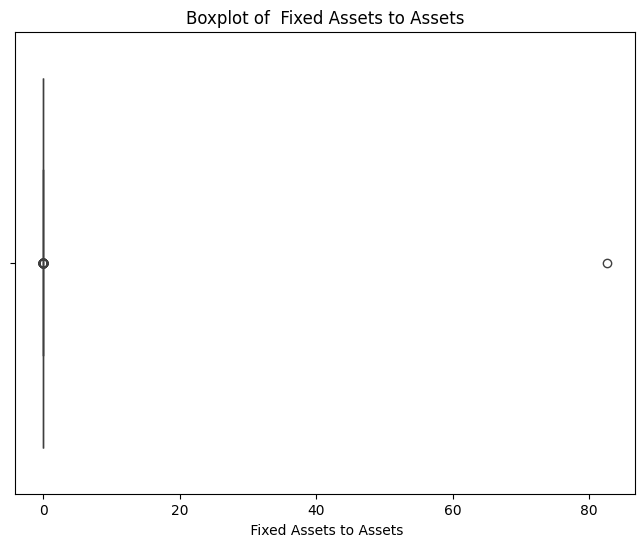

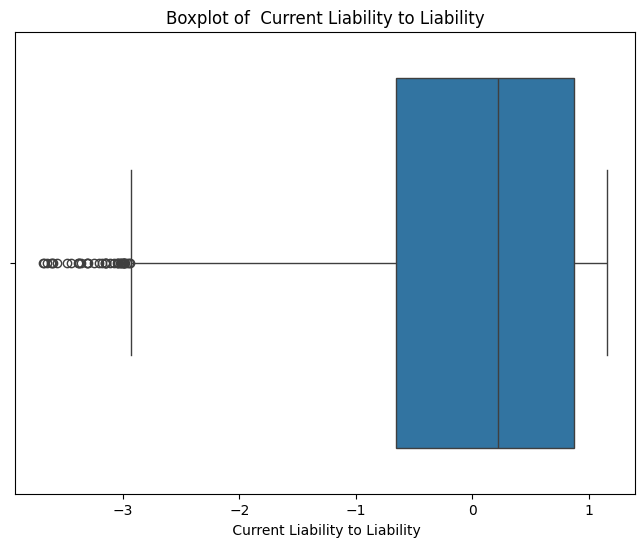

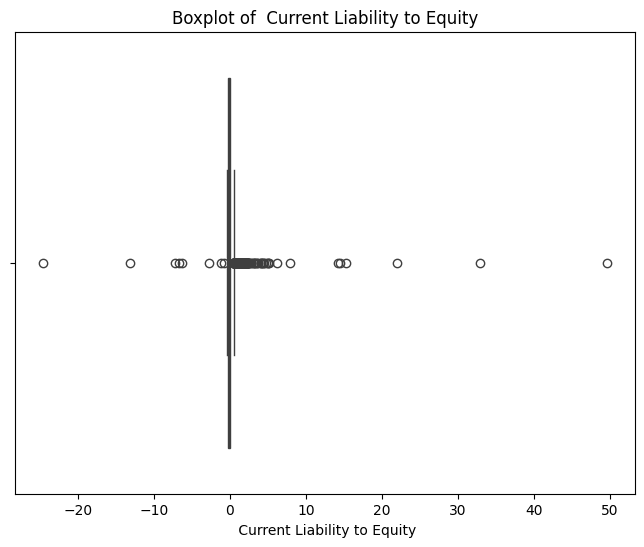

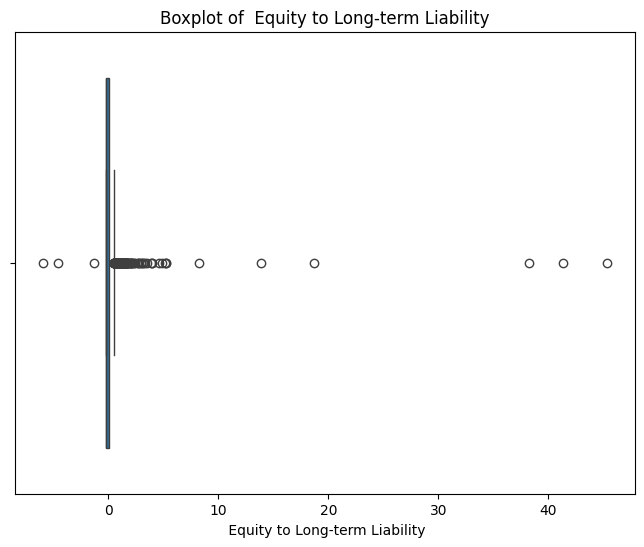

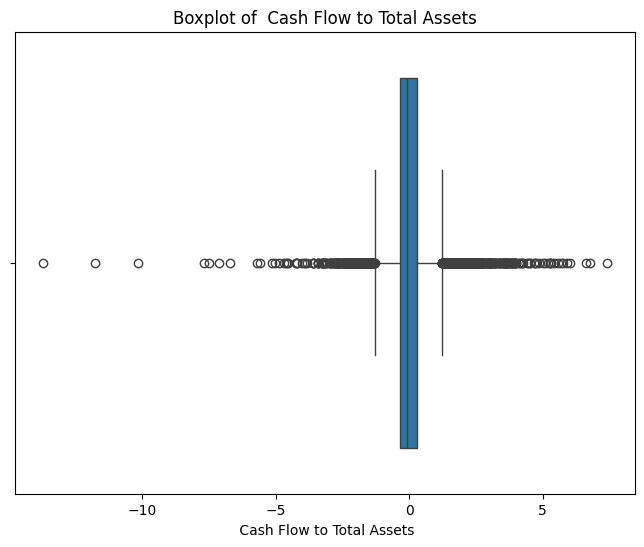

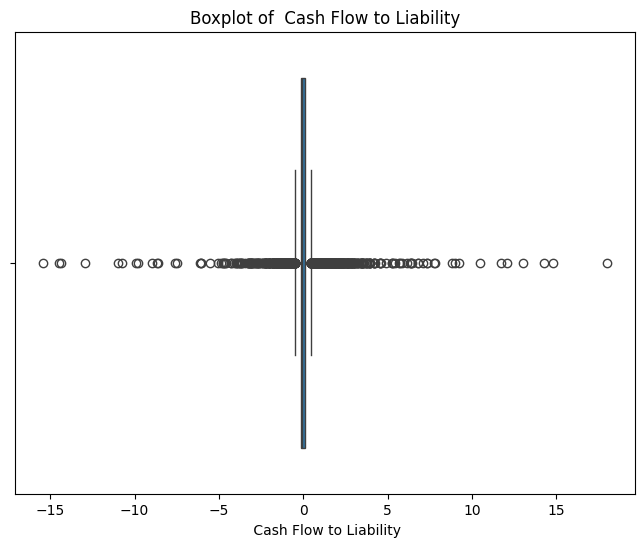

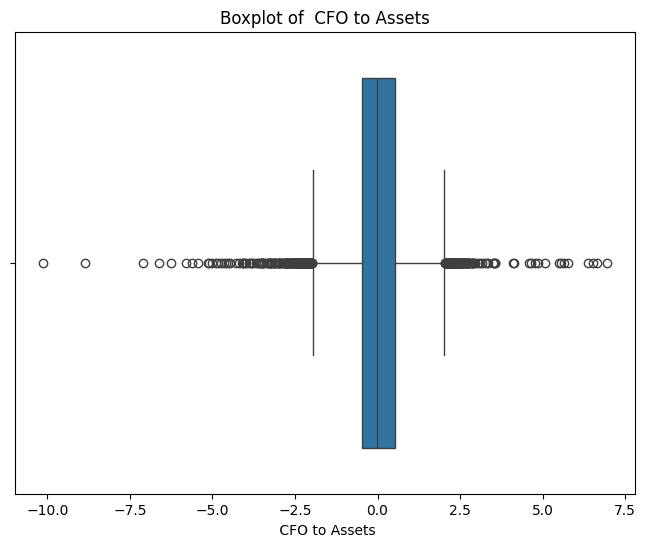

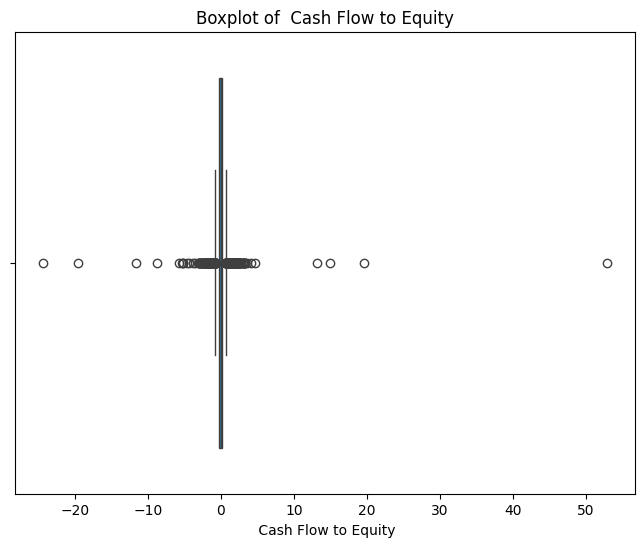

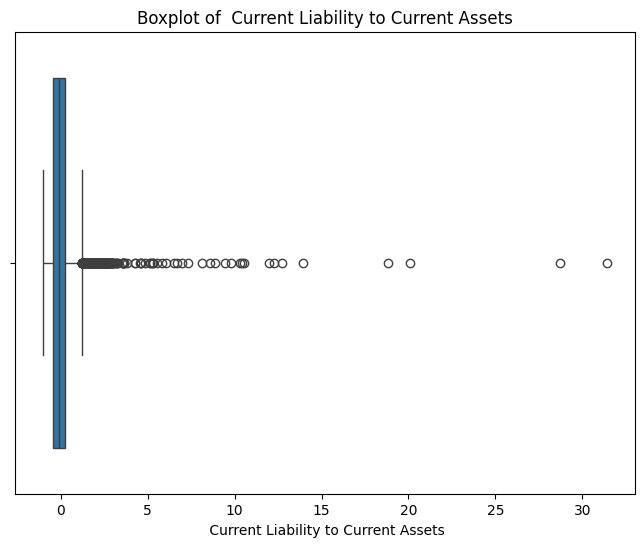

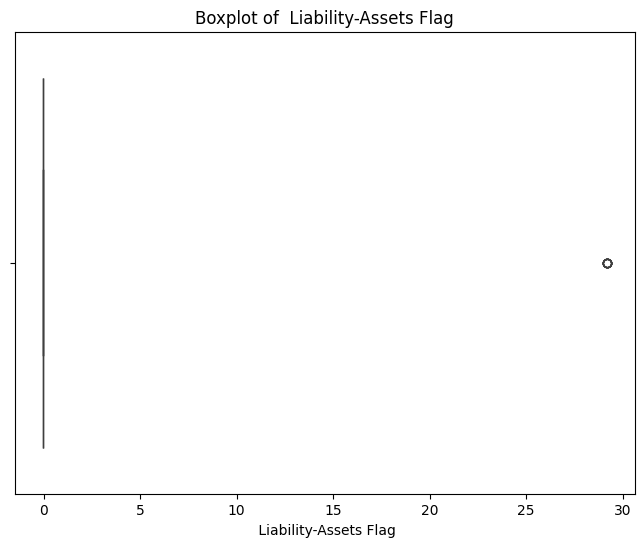

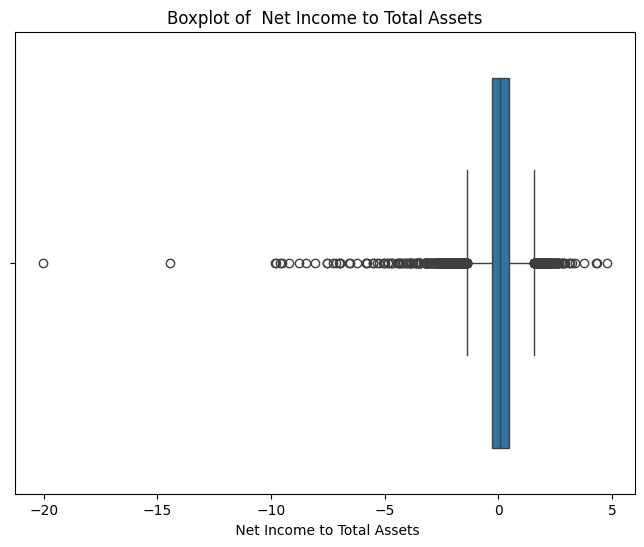

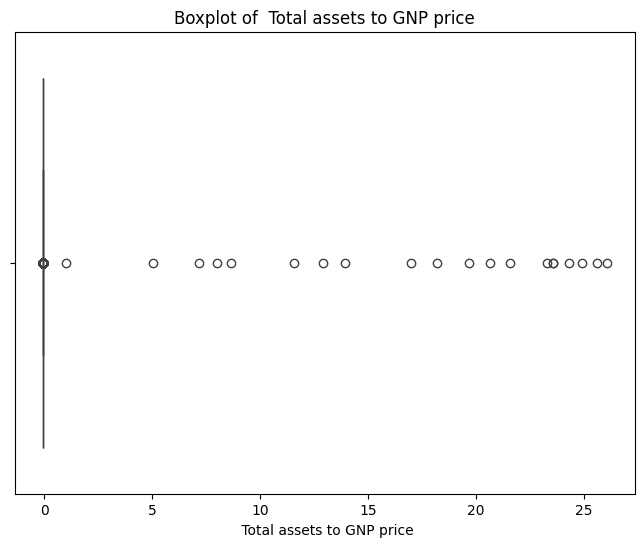

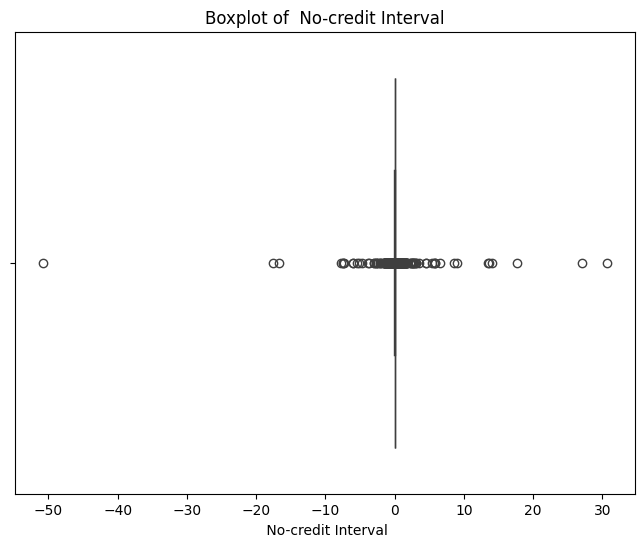

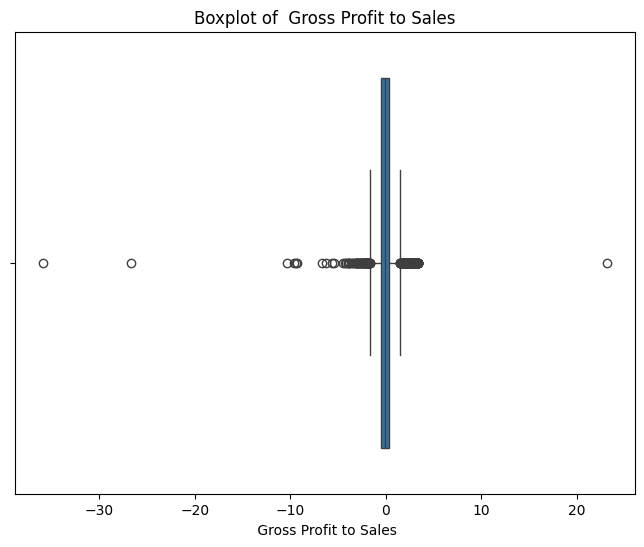

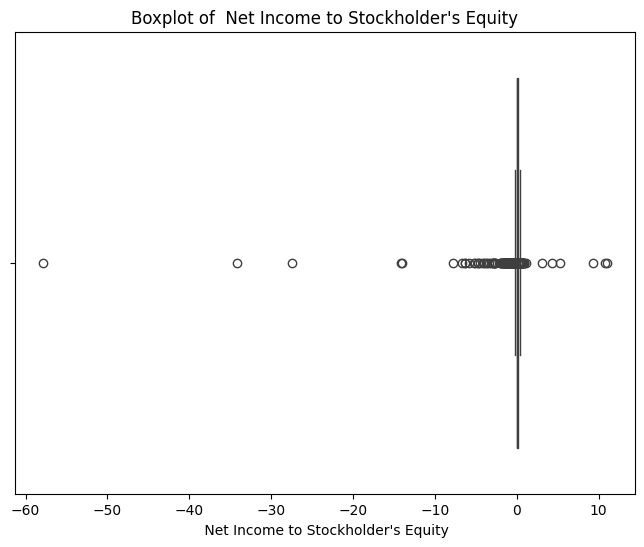

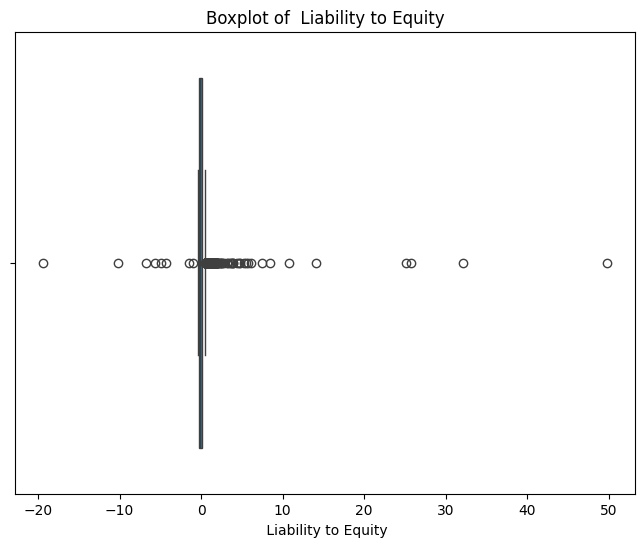

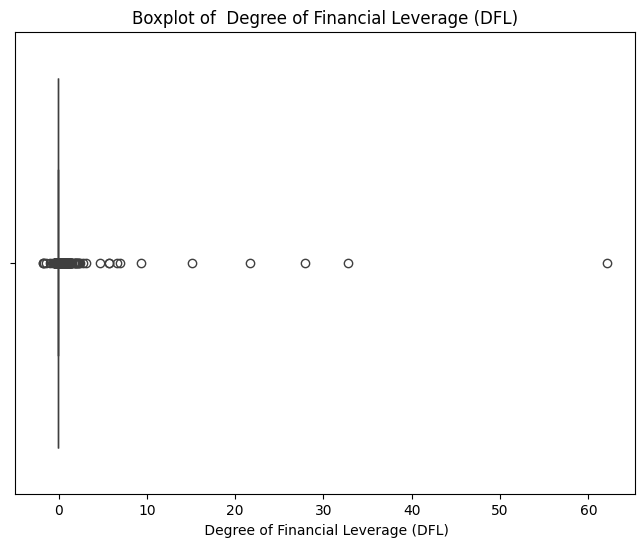

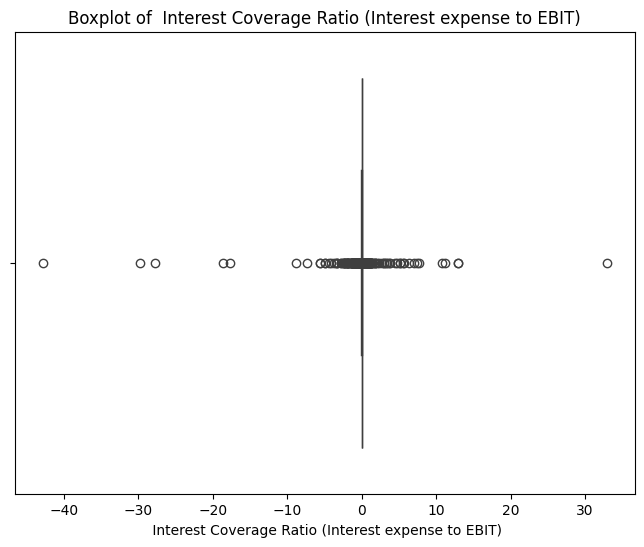

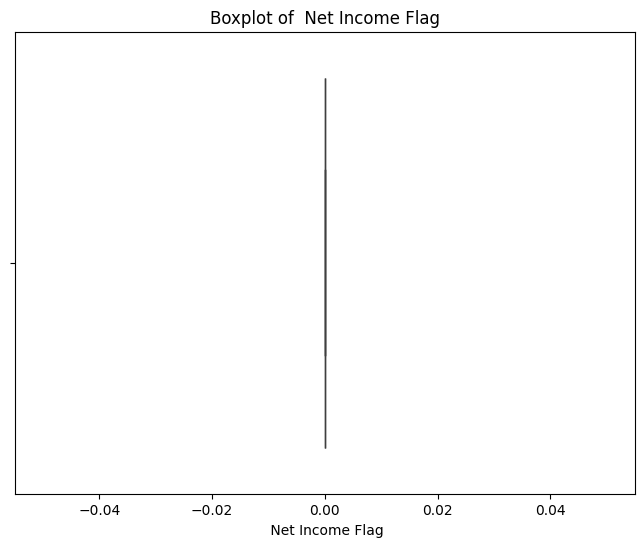

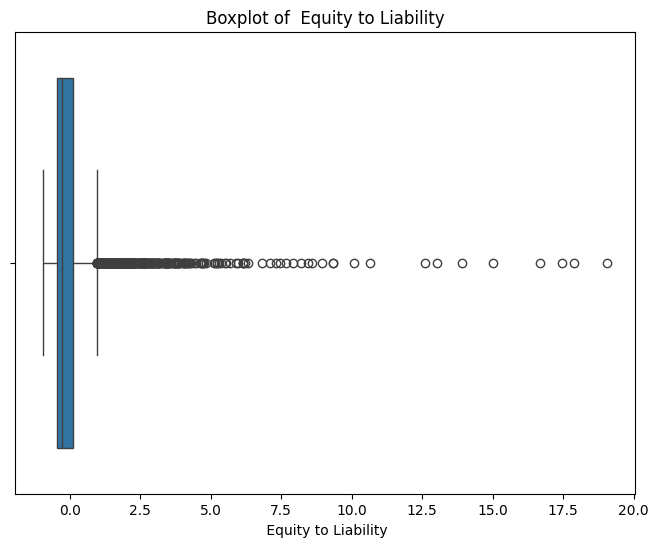

In [217]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

In [218]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,1,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,1,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,1,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,...,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,0.0,-0.353693
6815,0,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,...,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,0.0,-0.185856
6816,0,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,...,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,0.0,1.001206
6817,0,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,...,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,0.0,-0.071364


**outlier handling using IQR technique by determine lower bound and upper bound of numeric columns in dataset**

In [219]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower_bound, upper_bound)

In [220]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [221]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,-1.931507,-1.577429,-1.811241,-0.383334,-0.382638,0.016456,-0.007256,-0.000625,-0.030013,...,-1.377844,-0.049491,-0.084274,-0.383465,-0.251387,0.542204,-0.059553,-0.079391,0.0,-0.622067
1,1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,-0.028397,0.092047,0.0,-0.535573
2,1,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.007256,-0.000625,-0.030013,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.542204,-0.059553,-0.079391,0.0,-0.621960
3,1,-1.735886,-1.577429,-1.556340,-1.441418,-1.441832,0.002007,-0.007256,-0.000625,-0.024491,...,-1.377844,-0.049491,-0.080226,-1.441526,-0.251387,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,1,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.059553,0.092047,0.0,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,...,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,0.0,-0.353693
6815,0,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,...,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,0.0,-0.185856
6816,0,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,...,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,0.0,0.955831
6817,0,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,...,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,0.0,-0.071364


# **SVM Model**
**for paper**: https://www.scirp.org/journal/paperinformation?paperid=80398#t6

In [190]:
print(data['Bankrupt?'].value_counts())


Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [191]:
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

**Split the dataset**

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

**Normalize the features**

In [235]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train SVM classifier with RBF kernel**

In [261]:
svm_clf = SVC(kernel='rbf', C=1000, gamma='scale', probability=True, class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(C=1000, class_weight='balanced', probability=True, random_state=42)

**Predictions**

In [262]:
y_pred = svm_clf.predict(X_test_scaled)
y_proba = svm_clf.predict_proba(X_test_scaled)[:, 1]

**Evaluations**

In [263]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.53      0.48      0.50        44

    accuracy                           0.97      1364
   macro avg       0.75      0.73      0.74      1364
weighted avg       0.97      0.97      0.97      1364



In [264]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1301   19]
 [  23   21]]


In [265]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.92%


In [266]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.9073347107438017


**ROC Curve**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


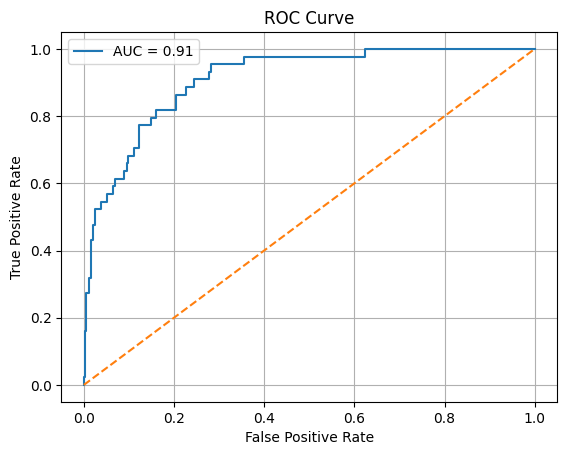

In [267]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_proba = svm_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

**RFE "Recursive Feature Elimination"**

It's a feature selection technique that helps to choose the most important features from your dataset.

The mechanism:
beggin with all your features, trains a model, Then removes least important feature for it, and repeats this process recursively until the desired number of features is left.

In [252]:
#Use a linear SVM to perform RFE
linear_svc = LinearSVC(max_iter=5000, dual=False)
selector = RFE(estimator=linear_svc, n_features_to_select=10)
selector.fit(X_train_scaled, y_train)

RFE(estimator=LinearSVC(dual=False, max_iter=5000), n_features_to_select=10)

In [254]:
#Selected features
selected_features = X.columns[selector.support_]
print(" Selected Features:\n", selected_features)

 Selected Features:
 Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate',
       ' Total debt/Total net worth', ' Net Income to Total Assets'],
      dtype='object')


In [255]:
#Reduce train/test to selected features
X_train_rfe = X_train_scaled[:, selector.support_]
X_test_rfe = X_test_scaled[:, selector.support_]

In [256]:
#Train your SVM with RBF kernel on selected features
svm_clf = SVC(kernel='rbf', C=1000, gamma='scale', probability=True, class_weight='balanced', random_state=42)
svm_clf.fit(X_train_rfe, y_train)

SVC(C=1000, class_weight='balanced', probability=True, random_state=42)

In [257]:
#Permutation Importance on the selected features
results = permutation_importance(
    svm_clf, X_test_rfe, y_test,
    n_repeats=10, random_state=42, scoring='f1')

In [258]:
#Map importance scores to selected features
importance_scores = pd.Series(results.importances_mean, index=selected_features)
print("\n Permutation Importance (mean decrease in F1):")
print(importance_scores.sort_values(ascending=False))



 Permutation Importance (mean decrease in F1):
Net Income to Total Assets                                 0.347082
ROA(C) before interest and depreciation before interest    0.324569
Net Value Per Share (B)                                    0.320366
Persistent EPS in the Last Four Seasons                    0.274655
ROA(A) before interest and % after tax                     0.268201
After-tax Net Profit Growth Rate                           0.267647
ROA(B) before interest and depreciation after tax          0.246533
Regular Net Profit Growth Rate                             0.174684
Total debt/Total net worth                                 0.141290
Net Value Per Share (C)                                    0.140326
dtype: float64


**Plot confusion matrix**

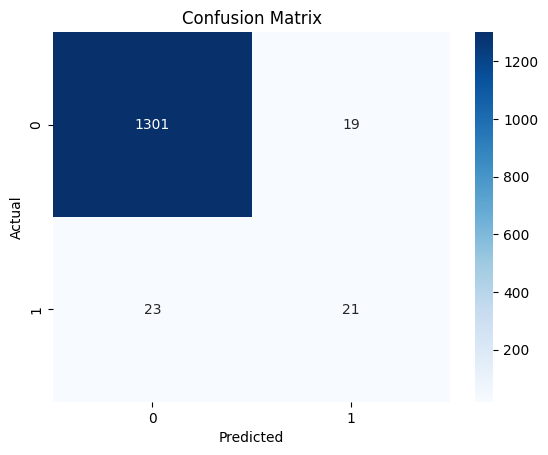

In [147]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()